Jack Conway, University of Rhode Island

# Abstract 

Compilers are capable of generating sources codes in different ways depending on which optimizations are applied. The goal of this paper is to predict the execution time of code given the optimizations applied to it. Being able to predict the execution time of code given the optimizations applied to it will allow one to choose the optimizations to apply to one's code for maximum speedup without needing to actually execute the code. There are 7 different compiler flags so the total number of optimizations one can apply are $2^{7}$ = 128 so in order to find the optimizations to apply to achieve the quickest execution time one would have to execute the code 128 times and then compare the execution times to choose the best optimizations. This can be problematic for code that takes a long time to execute as this would be very time consuming. To address this issue, this paper proposes the use of convolutional neural networks in order to predict a program's runtime without actually running it.

# Introduction 

## Objectives

This project aims to predict the execution time of a program using convolutional neural networks. The network takes in both static and dynamic code features as inputs. Static code features are features in the program that can be observed without executing the program while dynamic code features are feature that can only be observed if the program has been executed.

## Background 

Compilers have two objectives; translating the high level programming language into machine code, and optimizing the program. There are many different translations of a high level level program into binary that will function correctly but these different translations can have varying levels of performance. This means finding the most efficient way to represent a program in binary is a very important issue and one that can vastly improve a program’s performance. Finding the optimal way to compile each program is a very difficult problem and would have a huge sample space. To mitigate this, there have been several predefined compiler flags developed that each impact how the program is compiled into binary. The GCC compiler has seven distinct compiler flags that can be applied in order to optimize a program. These flags can optimize code size and execution time. This paper will ignore an optimization’s impact on code size and simply try to address the problem of attempting to predict a program’s execution time given its static and dynamic code features and the optimizations applied to it.

# Related Work

## Convolutional Neural Networks 

Convolutional neural networks have been applied in a wide range of tasks ranging from computer vision to natural language processing. Their ability to extract high level features from low level features makes them an extremely powerful machine learning method with many applications.

## Past Publications 

There have been many papers published on compiler optimization. One used a Bayesian model to capture the relationship between different compiler optimizations and static and dynamic program features. This paper attempted to maximize the speedup by choosing either the best optimization, the top 5 optimizations, or the top 10 optimizations. These papers also explore attempting to optimize code size or energy consumption as well as execution time. There have also been publications exploring the best optimizations to apply for overall performance, taking into account execution time, code size, and power consumption. These publications have employed several machine learning methodologies such as Linear Regression, KNN, Support Vector Machines, and Artificial Neural Networks to address the problem of compiler optimization.

## Feature Selection 

These publications also addressed the problem of choosing whether to use static or dynamic features. If one only trained from static features, the model would be incapable of extracting information about the program’s behavior in a runtime environment. For example, loop bounds are often determined by inputs and therefore it’s behavior can only be surmised at execution time. If one only trained from dynamic features, the model could only capture the program’s past behavior and would behave different when presented with new input. Using both static and dynamic features allows the model to infer the best information about a given program.

# Methodology 

## Data Preprocessing

The dataset’s predictor variables was constructed using static and dynamic code features from 24 programs and the 128 possible combinations of optimizations applied to them. The dataset’s target variables are the program’s execution time given the optimization applied to it. The dataset has 24 · 128 = 3072 rows, 286 feature variables, and 6 target variables. Code size was dropped as this paper aims to only explore the impact of optimizations on execution time leaving only the 5 execution times as target variables. The predictors was then scaled to values between 0 and 1 using scikit-learn’s MinMaxScaler function.

## Preliminary Modeling

For preliminary modeling SVMs, linear regression proved to be ineffective at addressing this problem so a KNN regressor and MLP were used.

## Hardware 

The hardware used to train the models for this paper were the Tesla K80 GPU provided through google colab.

## Model description 

The model used in this paper was a Convolutional Neural Network with 4 convolutional layers and 4 fully connected layers with a dropout probability of 0.2 applied after the first fully connected layer and batch normalization applied after the second fully connected layer. The sigmoid function was applied to the final layer of the model as the execution times have been normalized between 0 and 1. The loss function used was MSE and the optimizaer used was Adam.

In [1]:
from net import net
net.eval()

Net(
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv1): Conv1d(1, 10, kernel_size=(5,), stride=(1,), padding=(3,))
  (conv2): Conv1d(10, 20, kernel_size=(5,), stride=(1,), padding=(3,))
  (conv3): Conv1d(20, 10, kernel_size=(5,), stride=(1,), padding=(3,))
  (conv4): Conv1d(10, 1, kernel_size=(5,), stride=(1,), padding=(3,))
  (fc1): Linear(in_features=21, out_features=150, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=150, out_features=200, bias=True)
  (batch_norm): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=5, bias=True)
)

## Model Selection 

Leave-one-out cross validation was used for model selection with 1 out of 24 programs being held out as the test set for `50 epochs` with a `learning rate of 0.001`, a `batch size of 4` and `weight decay of 0.0001`. The left out program with the lowest test loss was used as the test set for future models as the other 23 applications represent the dataset the best. As the table below indicates `consumer_tiffmedian` had the lowest test loss and therefore was held out as the test set.

In [2]:
from loocv_metrics import loocv_metrics
loocv_metrics

App Name  Train Loss   Test Loss  Average Test Loss
0    automotive_bitcount   77.436748   66.012587          64.336754
1      automotive_qsort1   76.853754   55.395481          55.788803
2     automotive_susan_c   75.533460   69.375084          69.672432
3     automotive_susan_e   73.887032   53.469318          54.111845
4     automotive_susan_s   74.061451   64.606981          62.744159
5    security_blowfish_d   75.976219   79.035799          78.542744
6    security_blowfish_e   72.997946   78.822987          79.381326
7    security_rijndael_d   71.423774   88.925569          88.654496
8    security_rijndael_e   69.889910   93.302230          93.165911
9           security_sha   71.776641   75.481360          75.705095
10       telecom_adpcm_c   75.704070   60.228079          59.993954
11       telecom_adpcm_d   75.412056   60.558543          60.704608
12         telecom_CRC32   71.489138   62.708144          62.327349
13       consumer_jpeg_c   71.010459   52.581586          52.362099
14       consumer_jpeg_d   79.974796  112.043994         110.166613
15      consumer_tiff2bw   78.103103   77.397969          76.903792
16    consumer_tiff2rgba   77.006556   81.886718          81.647551
17   consumer_tiffdither   72.116867   72.716534          72.347274
18   consumer_tiffmedian   78.343632   51.682825          51.489163
19      network_dijkstra   76.548120   70.785083          70.522008
20      network_patricia   71.951530  106.745951         107.797174
21  office_stringsearch1   70.719433   78.992982          78.568624
22                bzip2d   78.469214   64.485166          64.203053
23                bzip2e   78.194614   54.553296          55.328018

# Experiments, Results, and Analysis 

## Preliminary Modelling

For preliminary Modelling `KNN` was used.

Test Loss: 0.09341489


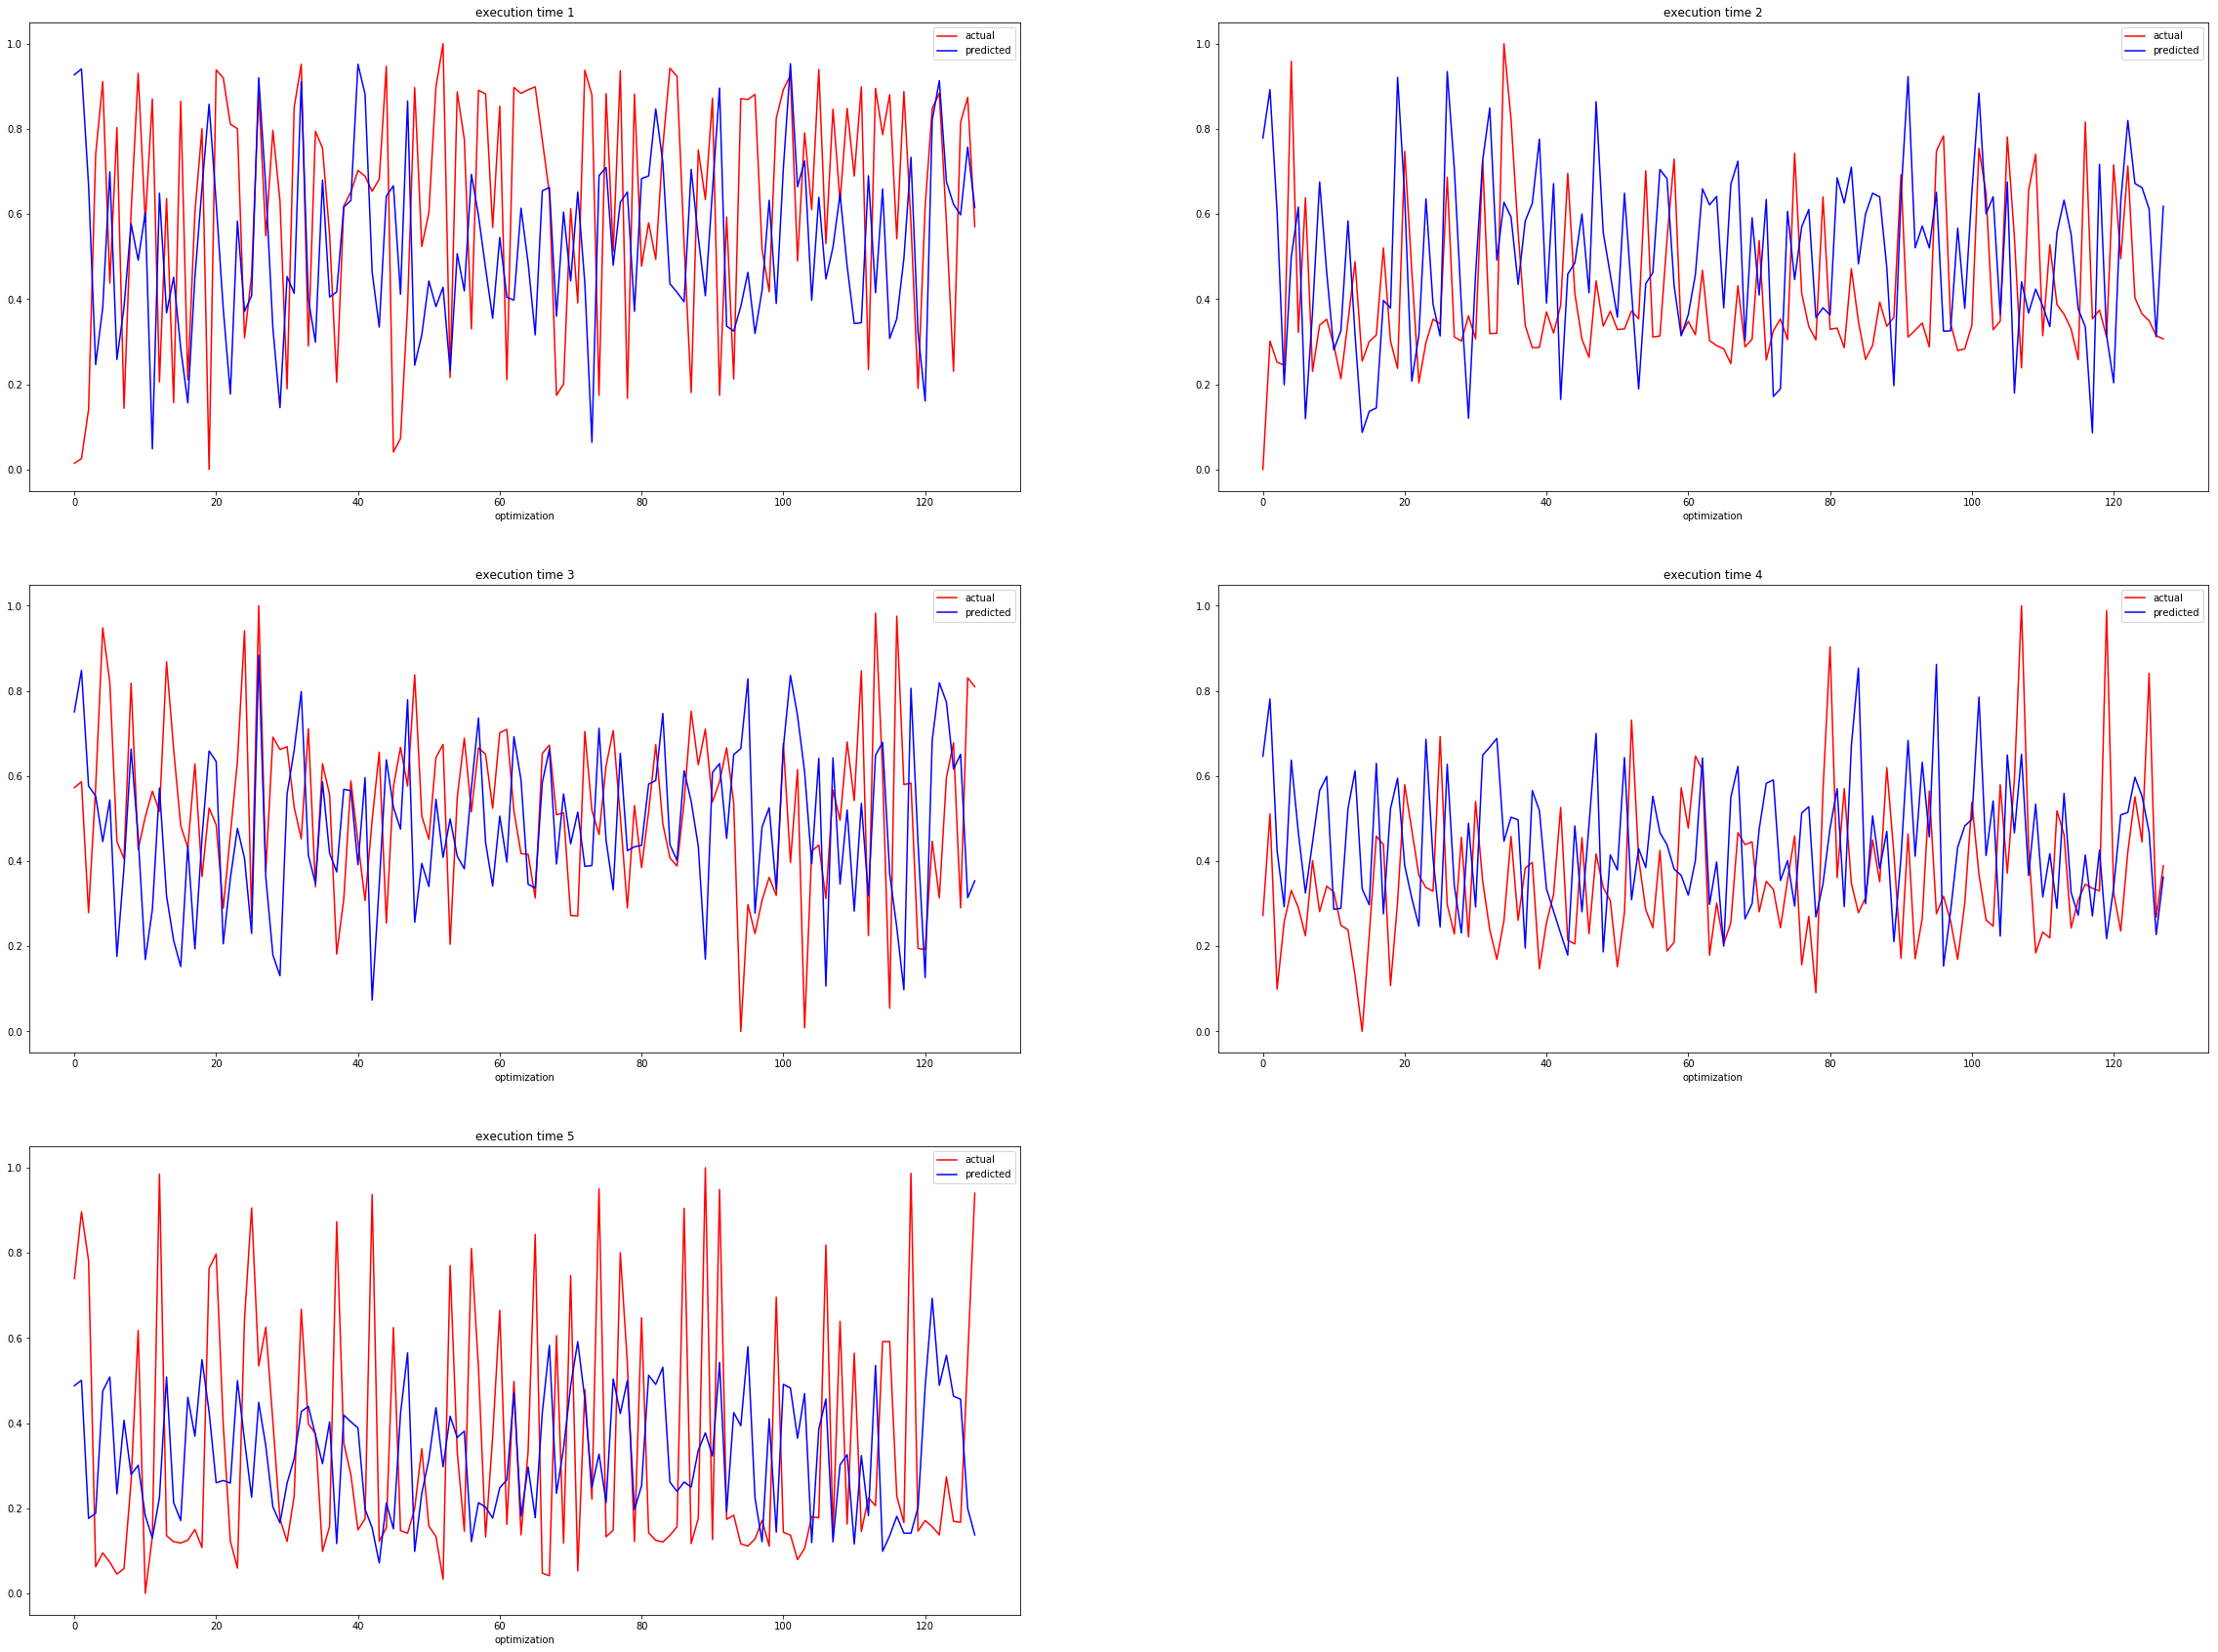

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from train_set import train_set
from plot_execution_times import plot_execution_times
from test_set import test_set

train_set = train_set.numpy()
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(train_set[:,:-5], train_set[:,-5:])
predictions = neigh.predict(test_set[:,:-5])
print('Test Loss:', mean_squared_error(test_set[:,-5:], predictions))

plot_execution_times(predictions, test_set[:, -5:])

As observed above, a `Test Loss of 0.100147665` was achieved for `KNN` with `K=3`

## Scaling

Below is a plot of the actual vs the predicted execution time for a convolutional neural network trained for 500 eopchs with a `batch size of 16`, a `learning rate of 0.0001`, and a `weight decay of 0.0001`. As displayed in the graph 3rd and 4th below, for some execution times the model outputs execution times that are significantly different from the actual execution times. This is likely due to the fact that the loss function was `MSE` and many of the applications probably had a similar execution time so the model figured it could minimize loss by just always outputting an execution time to match those applications. Some applications have execution times with a larger variance and would therefore impact the model's loss function more significantly. This mean that some of the applications would have a higher penalty on the loss function so our model would overrepresent these application's.

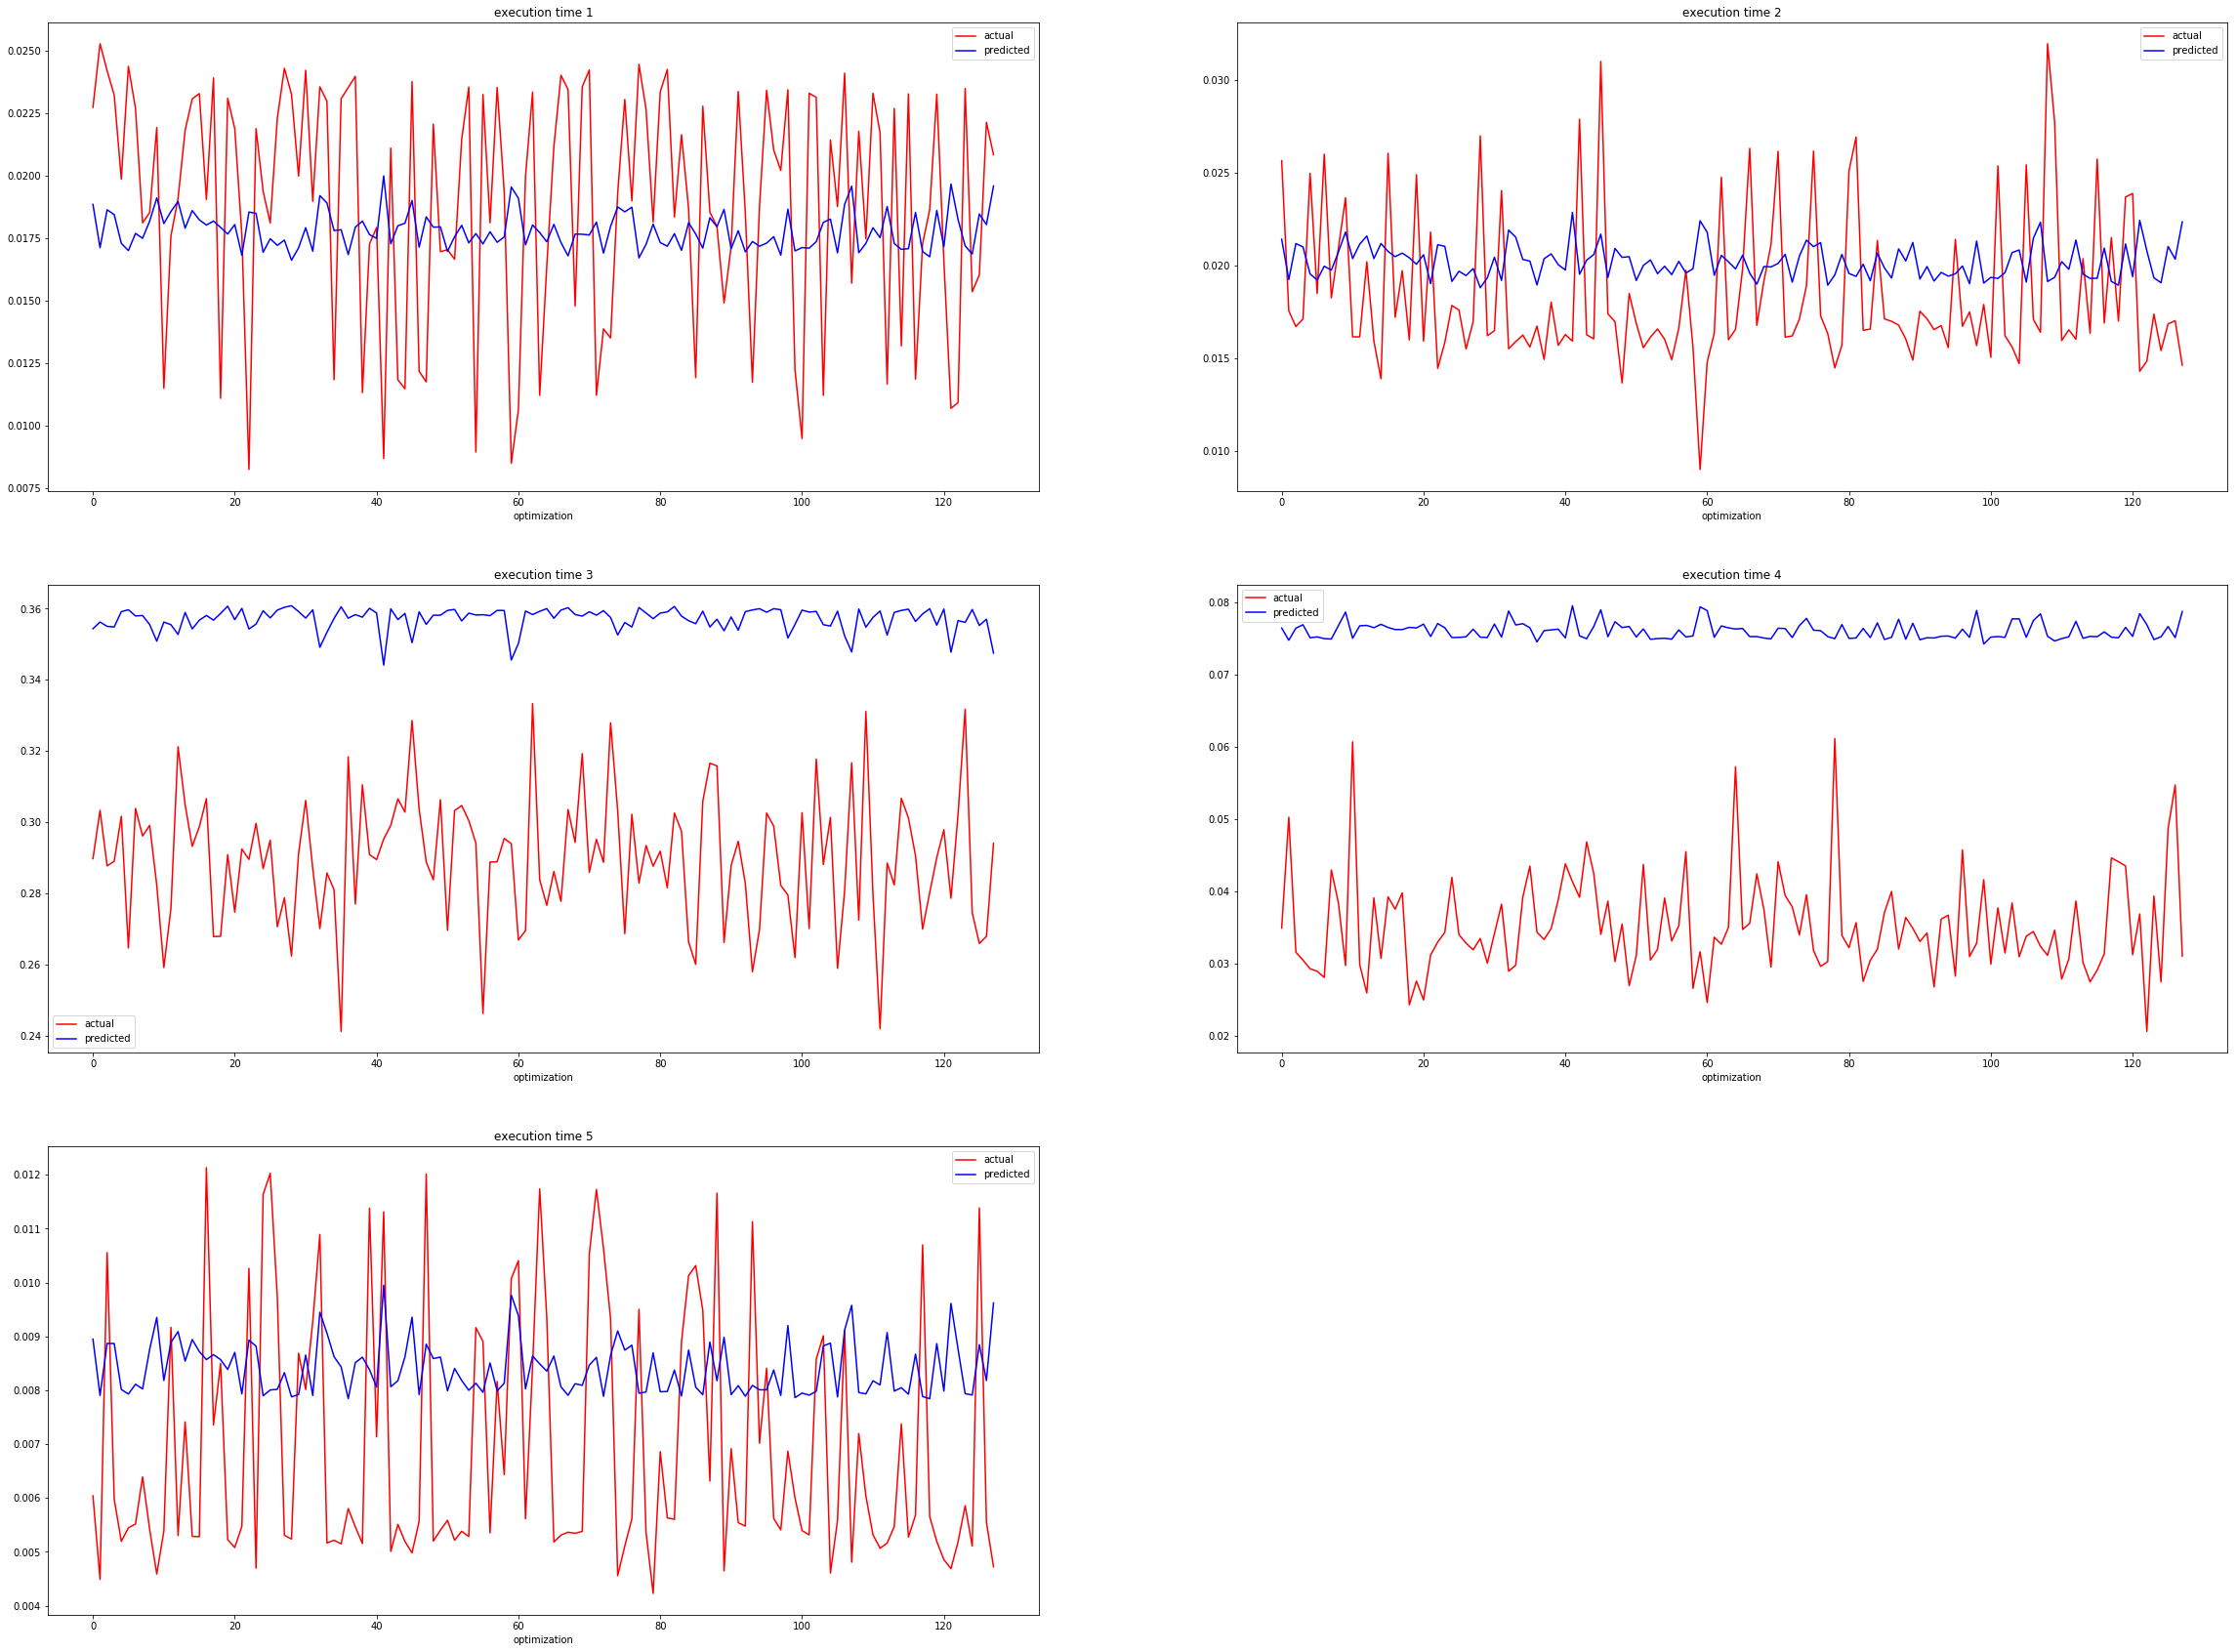

In [5]:
import torch
from predict import predict
from test_set_unscaled_ys import test_set_unscaled_ys

net.load_state_dict(torch.load('../models/left_out=consumer_tiffmedian__date=05-14-20__time=06-32__batch_size=16__lr=0.0001__weight_decay=0.0001__epochs=500__test_loss=0.0106937998207286UNSCALED_YS', map_location=torch.device('cpu')))
predictions = predict(net, 32, test_set_unscaled_ys)
plot_execution_times(predictions, test_set_unscaled_ys[:, -5:])


To mitigate this each application's individual execution time was scaled between 0 and 1 as opposed to scaling all exection times between 0 and 1 so that the model would try to learn each application individually as opposed to just learning the ones with the highest variance in execution time. Scaling each application's execution time between 0 and one means that each application will have an equal impact on the loss function and some won't penalize it more. As displayed in the graph beolow of a model trained for 500 epochs with a `learning rate of 0.0001` and a `weight decay of 0.0001`, Scaling each individual application's execution time between 0 and 1 yielded a model with more accurate predictions. As displayed below, the model has a `Test loss of 0.071`. This is quite better than `KNN's Test loss of 0.101`.

Test Loss: 0.07188123


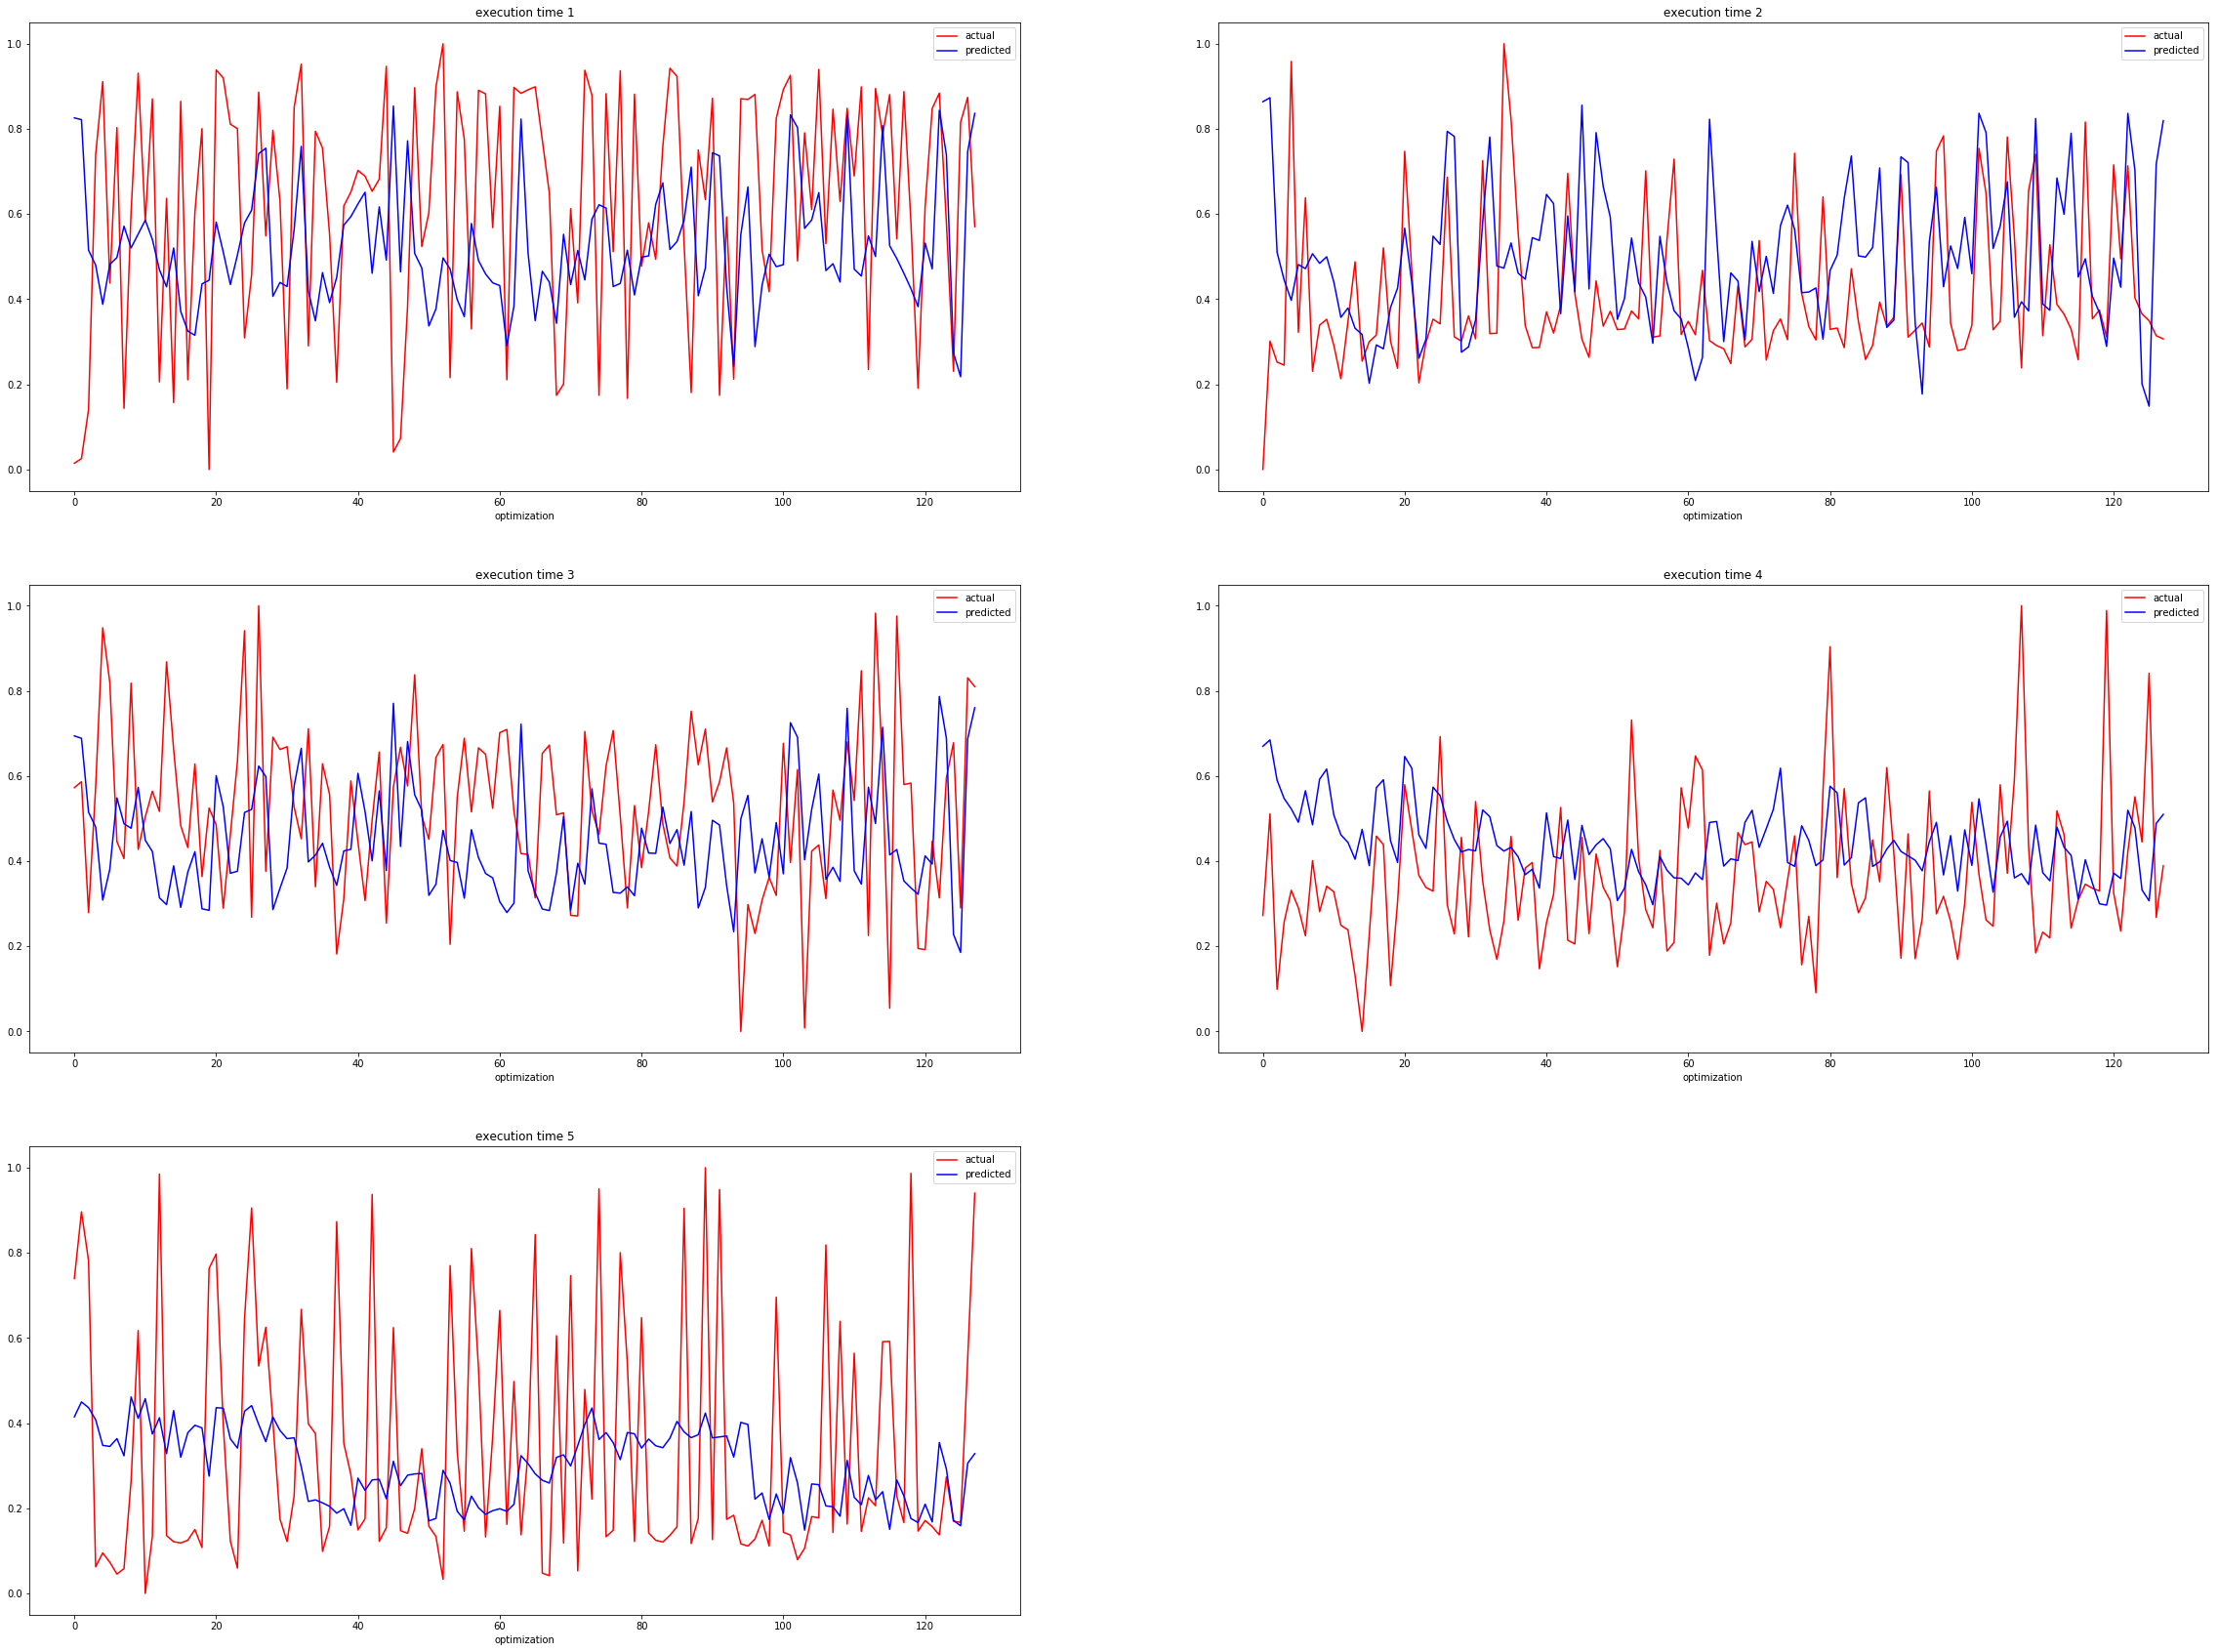

In [6]:
from test_set import test_set
net.load_state_dict(torch.load('../models/left_out=bzip2d__date=05-10-20__time=20-20__batch_size=32__lr=0.0001__weight_decay=0.0001__epochs=499__test_loss=0.288957916200161_3_convolutions', map_location=torch.device('cpu')))
predictions = predict(net, 32, test_set)
print('Test Loss:', mean_squared_error(test_set[:,-5:], predictions))
plot_execution_times(predictions, test_set[:, -5:])


## Learning Rate

Several model's were trained and evaluated. The optimal learning rate was found to be `0.0001`. A learning rate of `0.001` was to agressive and a learning rate of `0.00001` was unable to fit the data as pictured below. While the model below has a better `Test Loss` than others achieved using a more agressive learning rate. It can be observed that the predicted execution times are simply a straight line going across the mean og the actual exection times. It isn't fitting each execution time given the optization applied to it.

Test Loss: 0.05870528


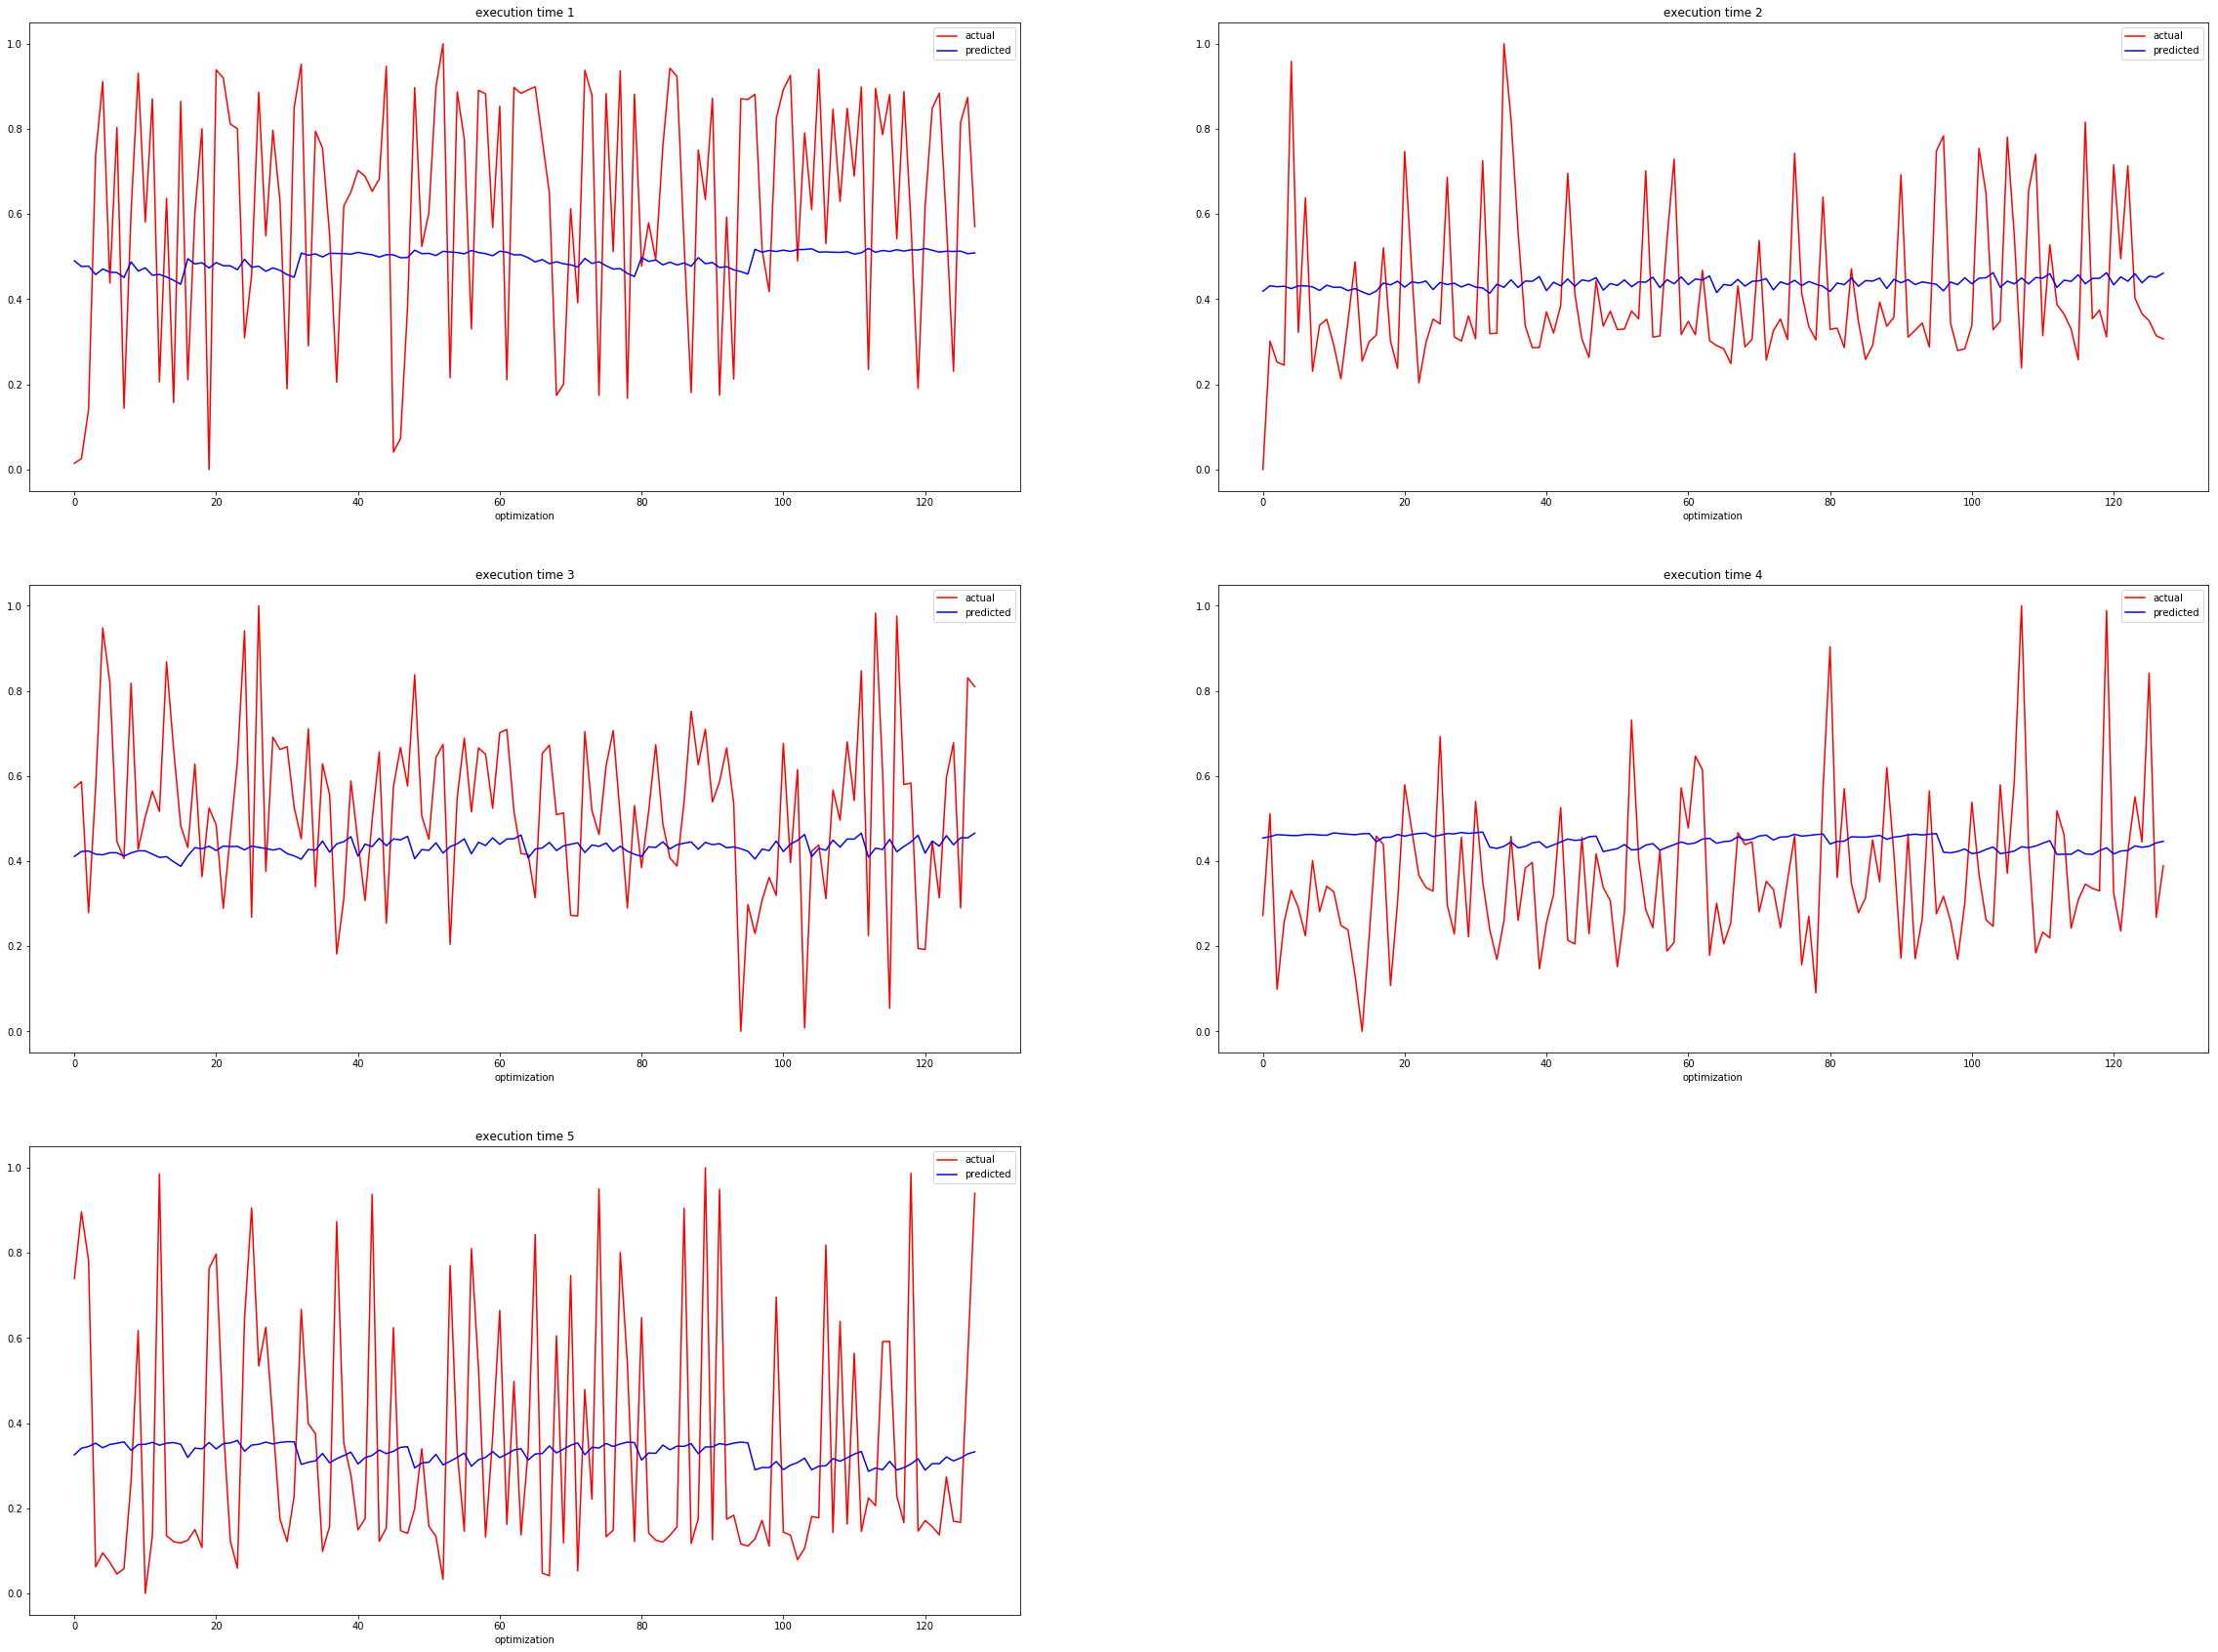

In [7]:
net.load_state_dict(torch.load('../models/left_out=bzip2d__date=05-10-20__time=20-14__batch_size=32__lr=1e-05__weight_decay=0.0001__epochs=499__test_loss=0.23818934336304665_3_convolutions', map_location=torch.device('cpu')))
predictions = predict(net, 32, test_set)
print('Test Loss:', mean_squared_error(test_set[:,-5:], predictions))
plot_execution_times(predictions, test_set[:, -5:])


For this reason a learning rate of 0.0001 was chosen.

## Batch Size 

To select the optimal `batch size`, the model was trained for `500 epochs` with a `learning rate of 0.0001` and `weight decay of 0.0001`.

In [8]:
from batch_size_metrics import batch_size_metrics
batch_size_metrics

Batch Size  Test Loss
0           1   0.108115
1           4   0.114121
2           8   0.099359
3          16   0.098089
4          32   0.071881
5          64   0.086379
6         128   0.072200

As can be observed from the table above, a `batch size of 32` had the lowest loss and was therefore selected as the `batch size` for future models. Using a small batch size can help the model generalize better however this increases the training time significantly. The models with a `batch size of 1 and 4` took a significant amount of time to train.

## Final Model

The Final Model was trained with a `learning rate of 0.0001`, a `weight decay of 0.0001`, and a `batch size of 32`. The model was trained for `500 epochs`, `3000 epochs`, and `5000 epochs`. THe `learning rate` was changed to `0.00001` after `3000 epochs`.

Test Loss: 0.07188123


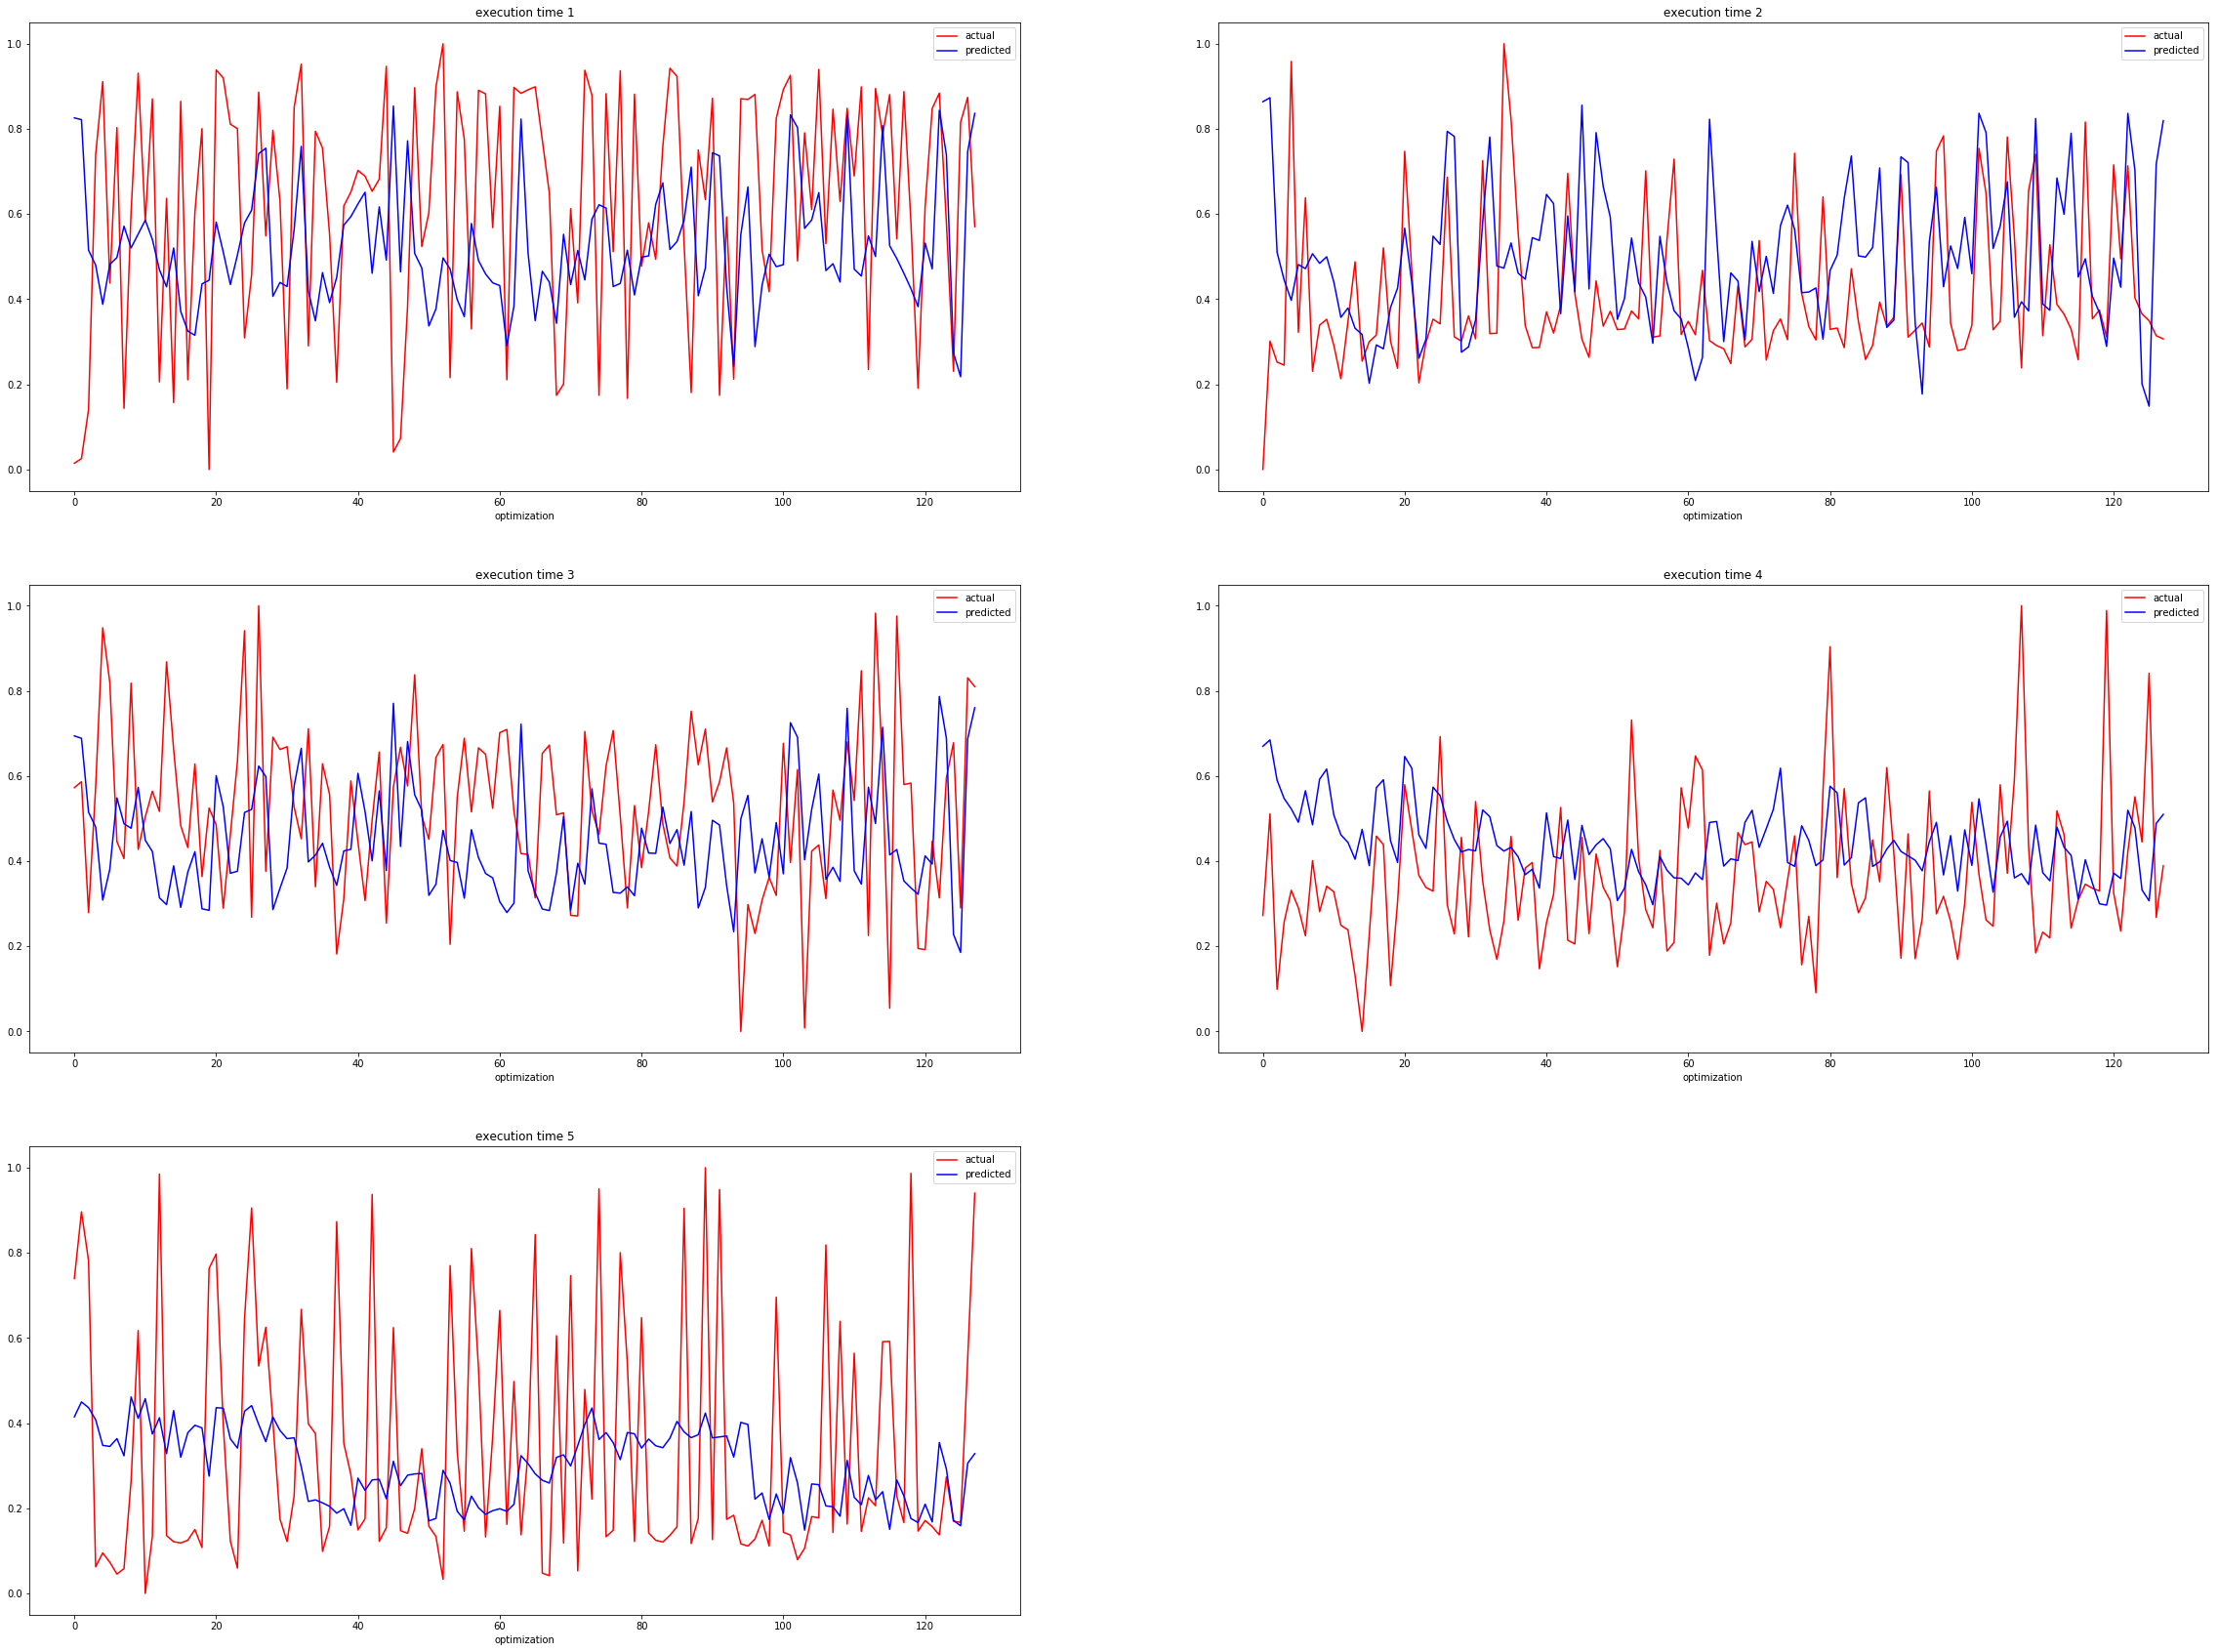

In [9]:
net.load_state_dict(torch.load('../models/left_out=bzip2d__date=05-10-20__time=20-20__batch_size=32__lr=0.0001__weight_decay=0.0001__epochs=499__test_loss=0.288957916200161_3_convolutions', map_location=torch.device('cpu')))
predictions = predict(net, 32, test_set)
print('Test Loss:', mean_squared_error(test_set[:,-5:], predictions))
plot_execution_times(predictions, test_set[:, -5:])


## Trained for 3000 epochs

Test Loss: 0.12382869


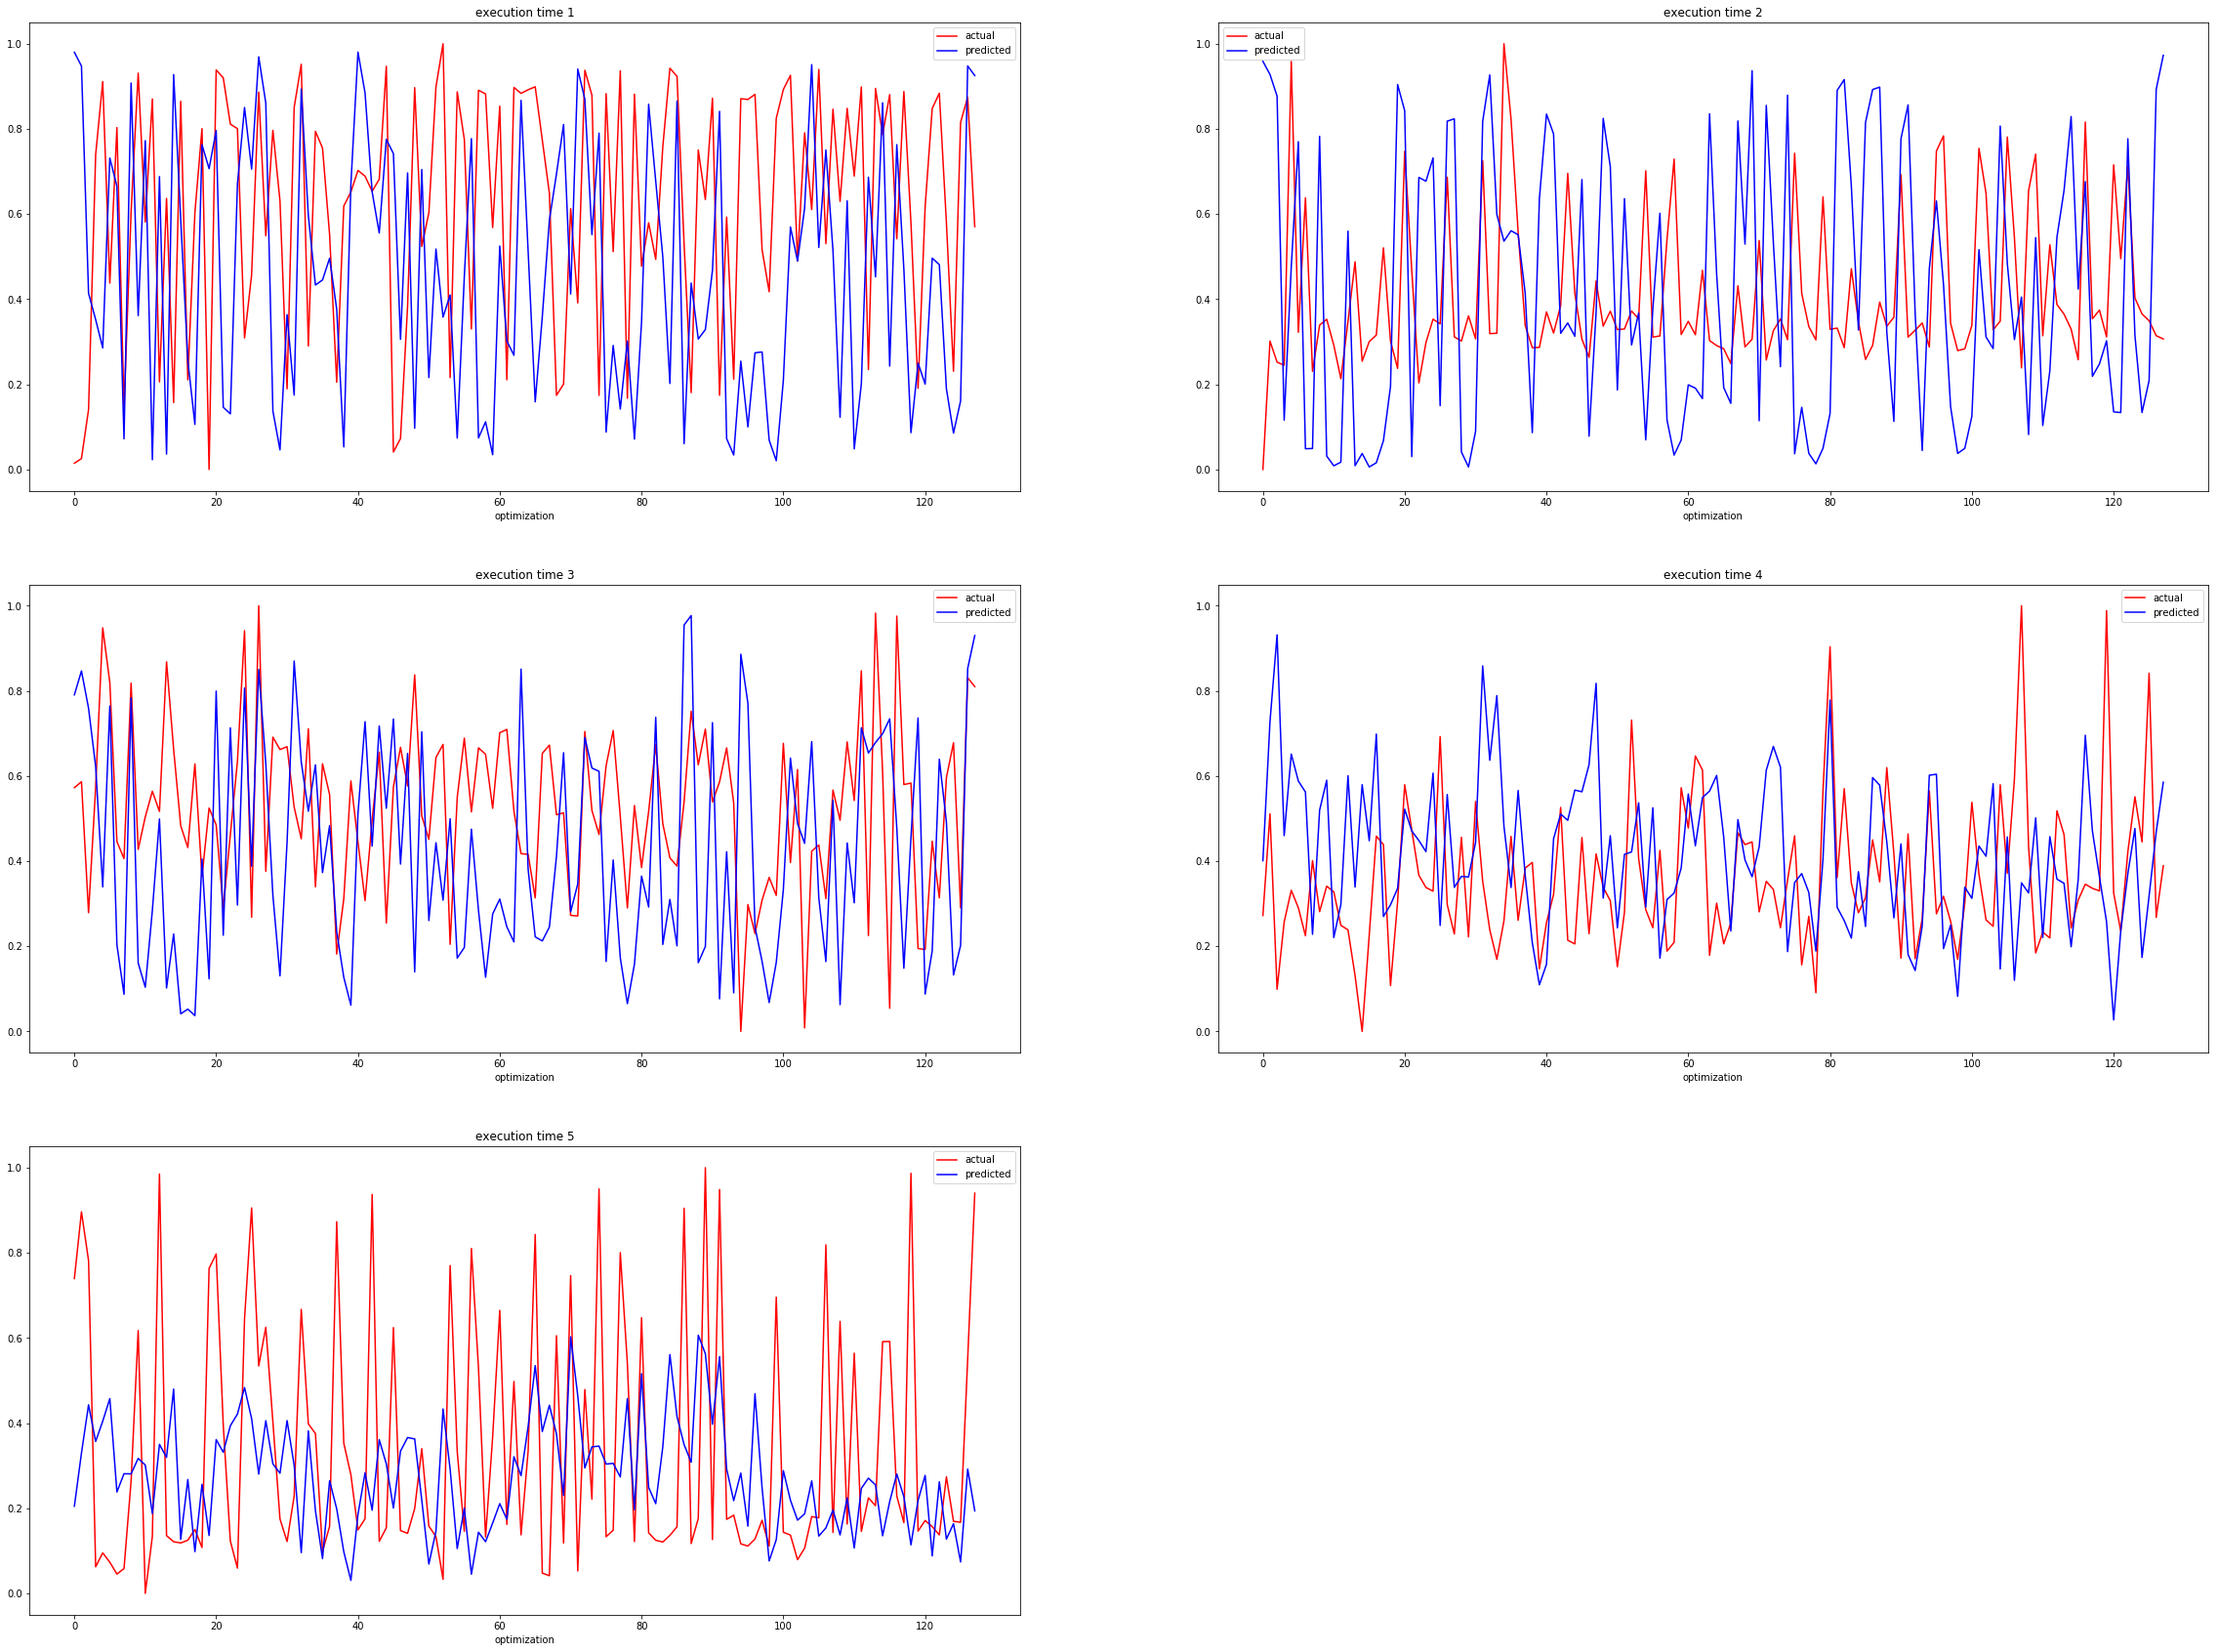

In [10]:
net.load_state_dict(torch.load('../models/left_out=consumer_tiffmedian__date=05-14-20__time=05-17__batch_size=32__lr=0.0001__weight_decay=0.0001__epochs=3000__test_loss=0.49531471729278564.49531471729278564_unscaled_targets', map_location=torch.device('cpu')))
predictions = predict(net, 32, test_set)
print('Test Loss:', mean_squared_error(test_set[:,-5:], predictions))
plot_execution_times(predictions, test_set[:, -5:])


## Trained for 5000 epochs

Test Loss: 0.11981235


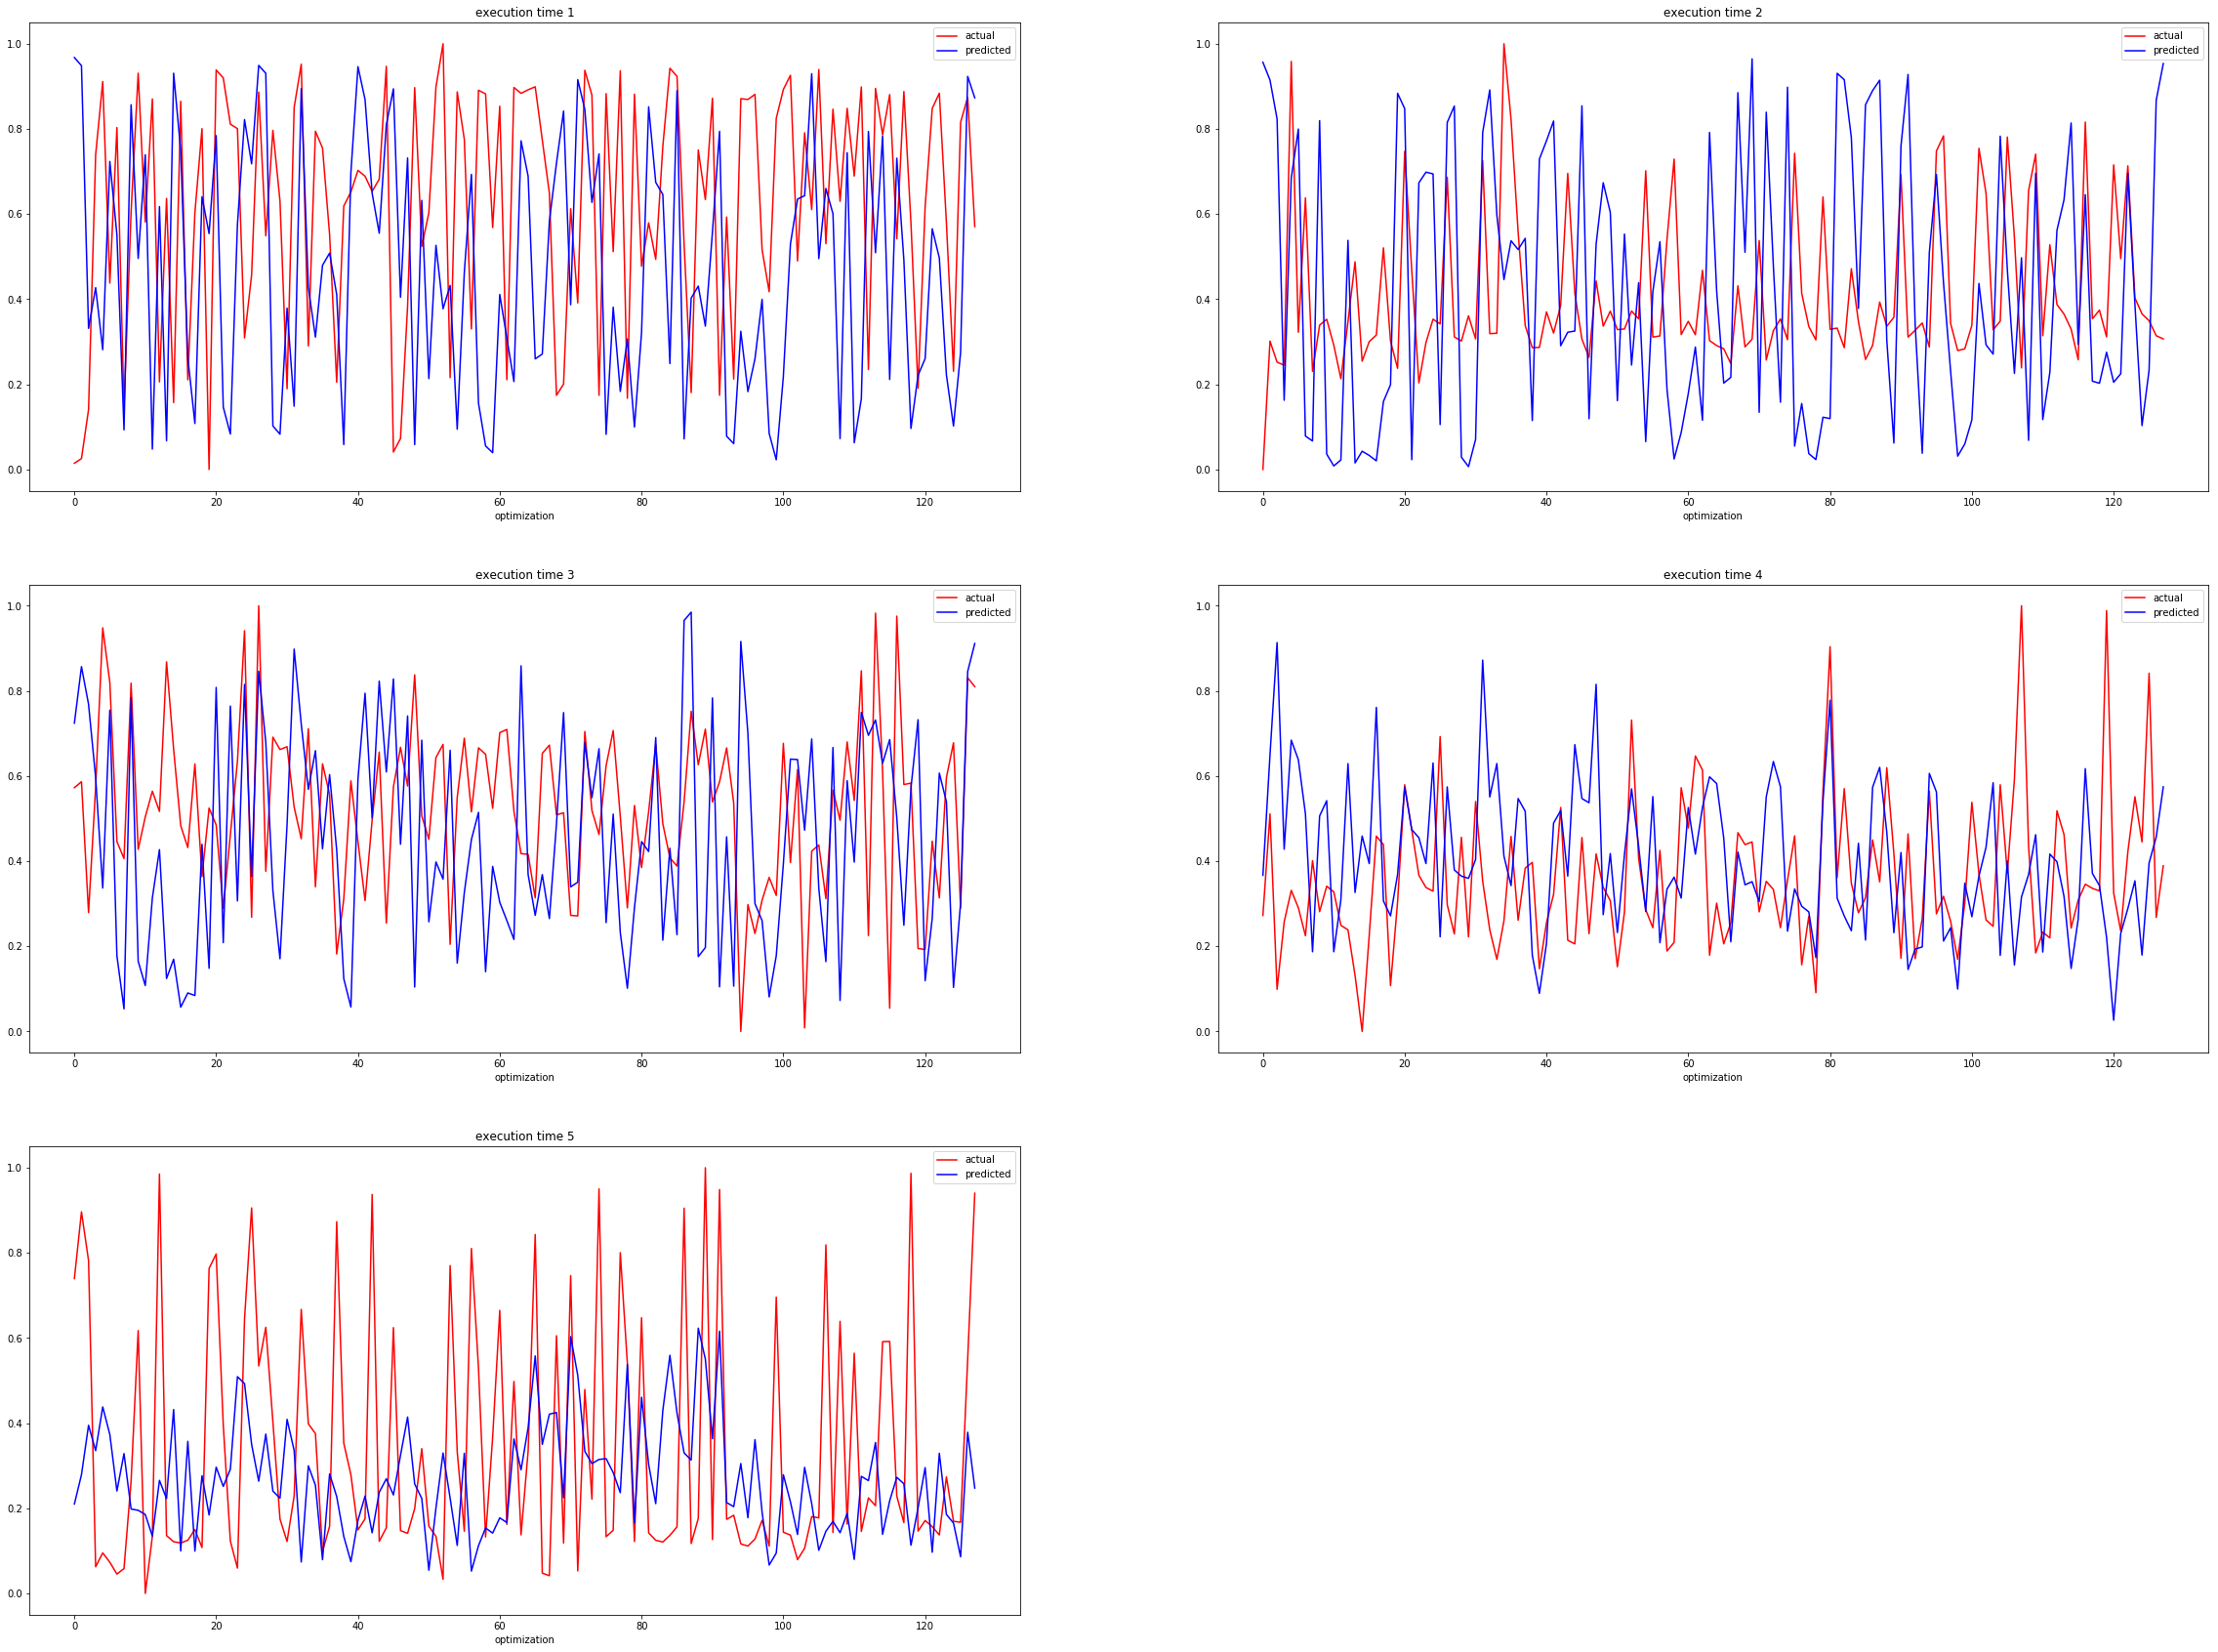

In [11]:
net.load_state_dict(torch.load('../models/left_out=consumer_tiffmedian__date=05-14-20__time=05-43__batch_size=32__lr=1e-05__weight_decay=0.0001__epochs=5000__test_loss=0.47924941778182983', map_location=torch.device('cpu')))
predictions = predict(net, 32, test_set)
print('Test Loss:', mean_squared_error(test_set[:,-5:], predictions))
plot_execution_times(predictions, test_set[:, -5:])


As can be observed from the above plots. The model trained for `500 epochs` had the lowest loss. This model seemed to generalize best on the training data, achieving a `Test Loss of 0.0718`

## Trained for 500 Epochs

The Model below was trained for `500 epochs` with a `learning rate of 0.0001`, a `batch size of 32`, and a `weight decay of 0`. This model had a `Test Loss of 0.0897`, slightly worse than the same model trained with a `weight decay of 0.0001`

Test Loss: 0.08972448


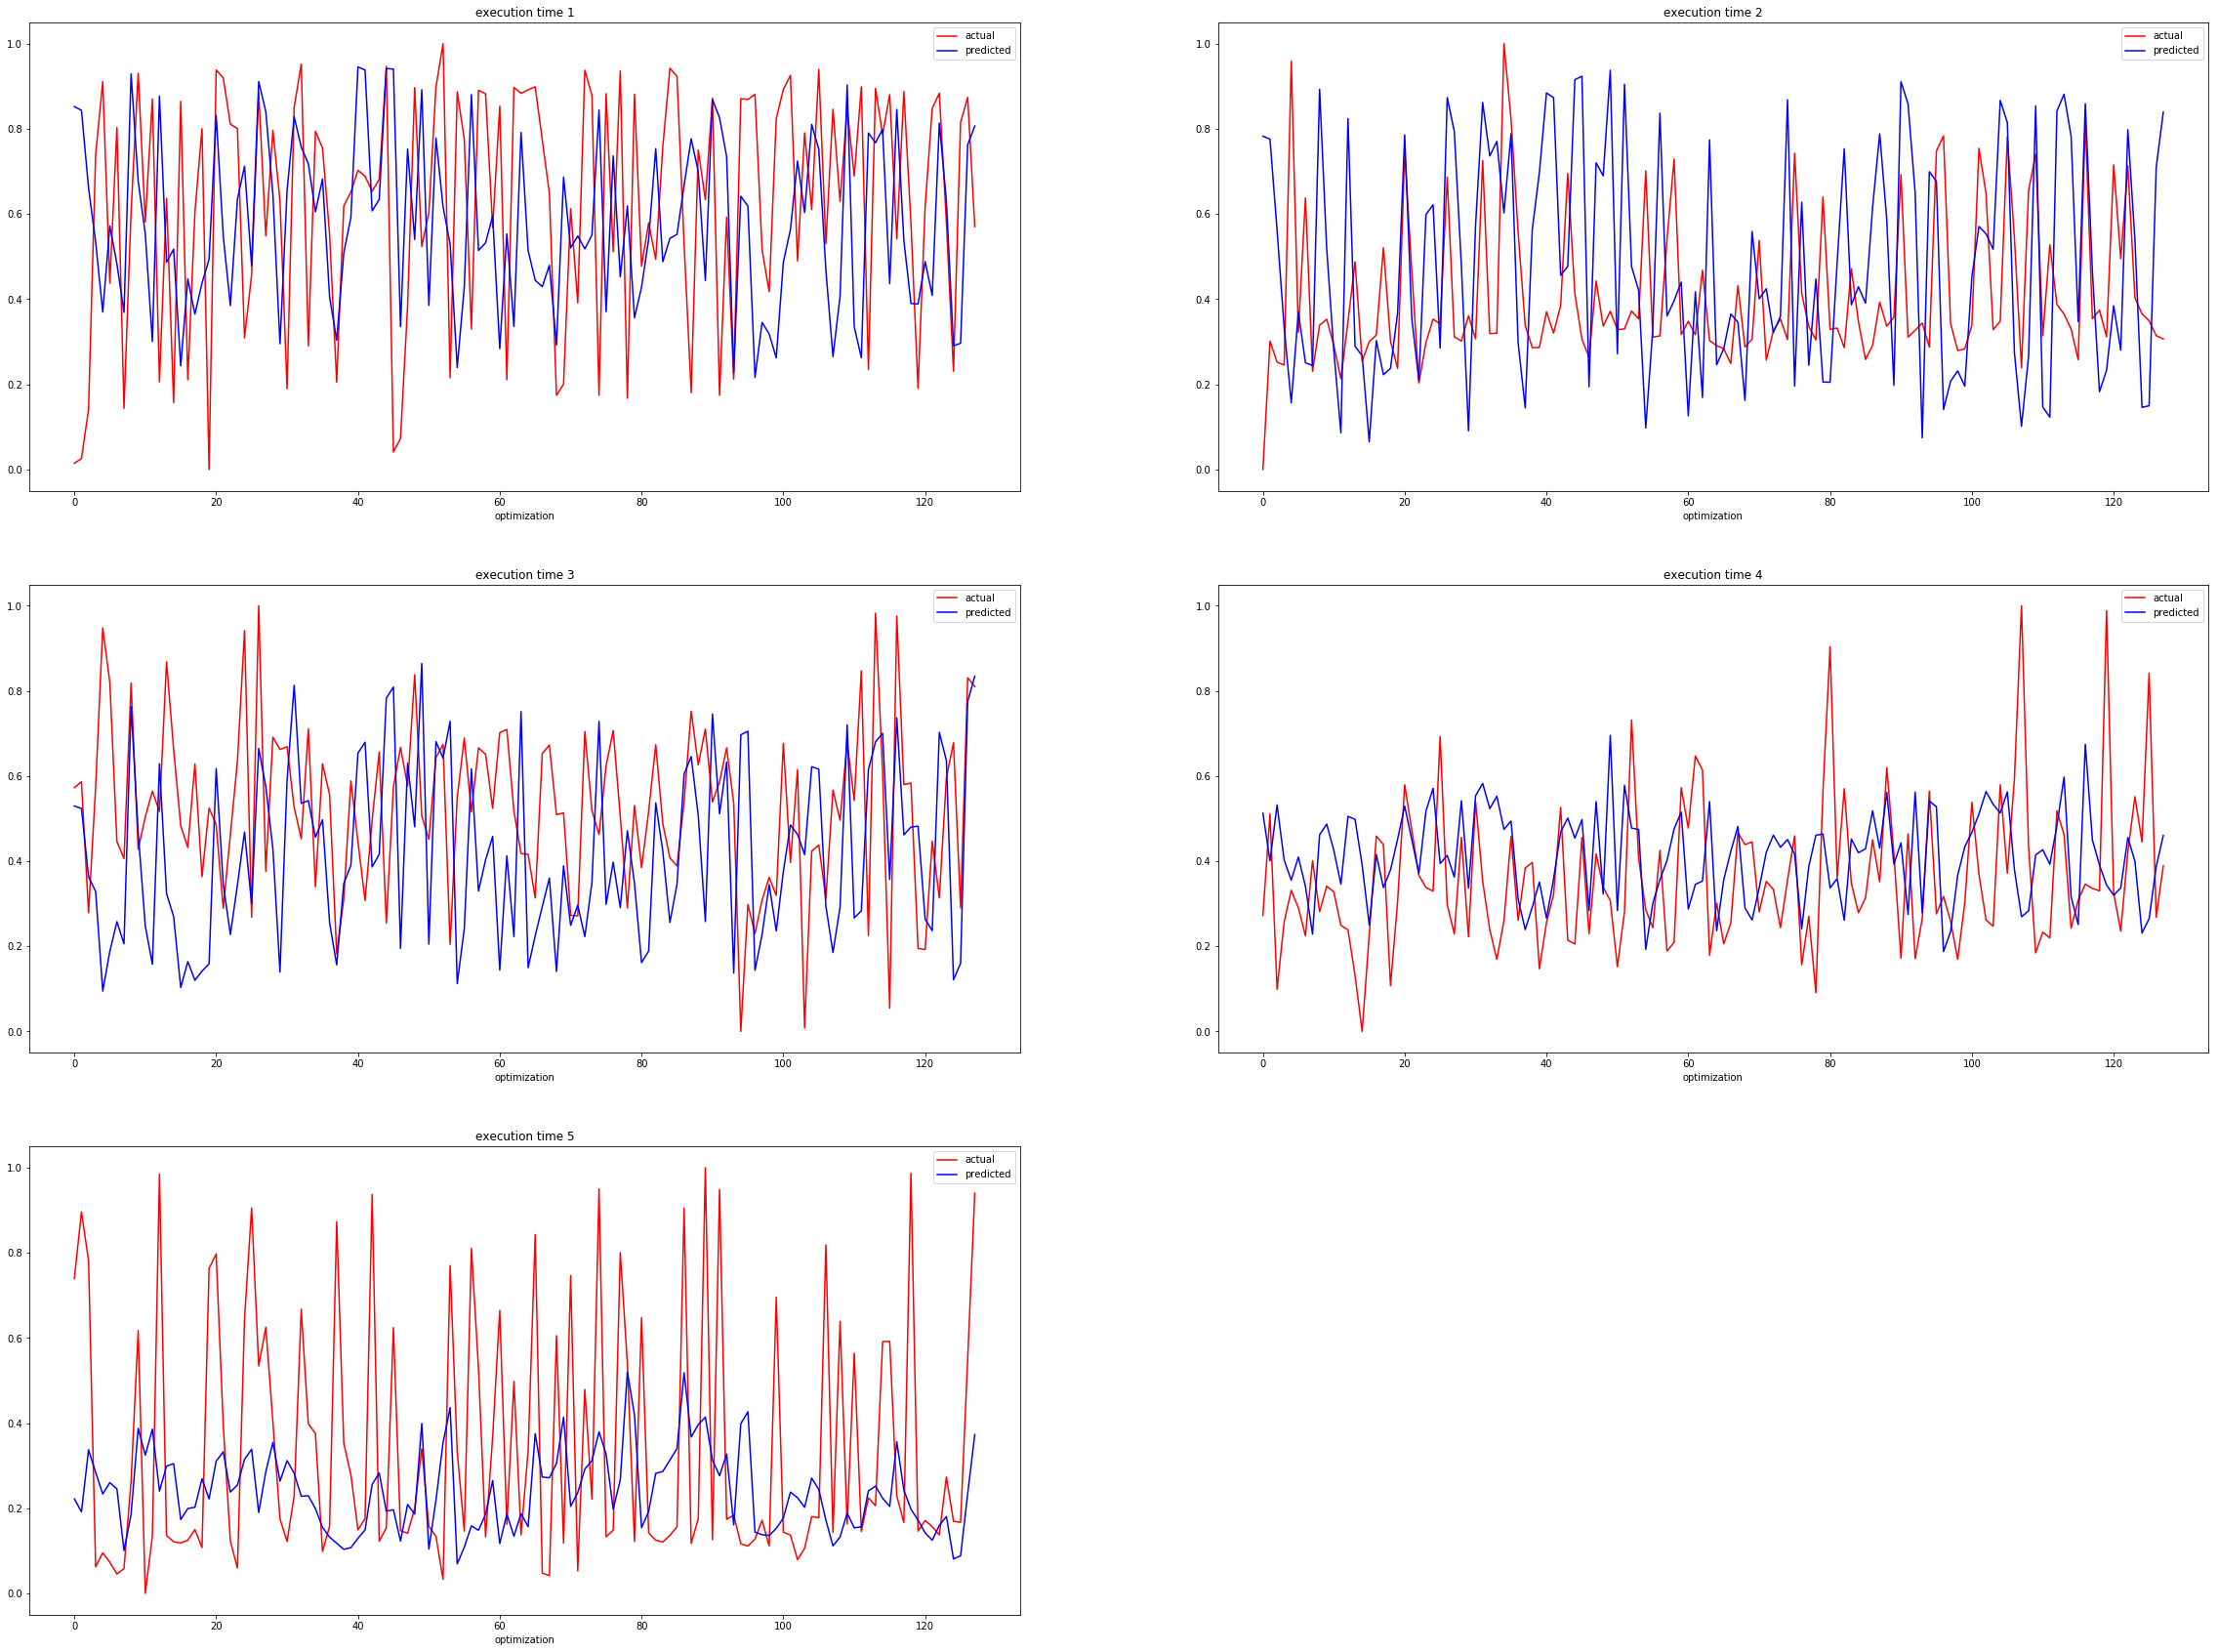

In [12]:
net.load_state_dict(torch.load('../models/left_out=consumer_tiffmedian__date=05-11-20__time=20-52__batch_size=32__lr=0.0001__weight_decay=0__epochs=500__test_loss=0.3588979169726372_3_convolutions', map_location=torch.device('cpu')))
predictions = predict(net, 32, test_set)
print('Test Loss:', mean_squared_error(test_set[:,-5:], predictions))
plot_execution_times(predictions, test_set[:, -5:])


## COBAYN Paper

The COBAYN paper used bayesian networks in order to find the best optimizations to apply. 

Since the COBAYN paper utilized Bayesian networks, one can investigate the dependencies between the variables involved in the compiler optimization problem more easily than a convolutional neural network. Bayesian Networks are a directed acyclic graph where the nodes represent predictors and the edges represent the relationships between the predictors. This means Bayesian  networks are very interpretable and allow one to investigate the relationship between predictors. Convolutional Neural networks are not very interpretable as they are essentially a blackbox function where only the input and output is known. Using Convolutional Neural Networks allows for less interpretable models so the relationships between predictors cannot be examined well.

The `O2` optimization is generally applied when one wants to minimize the execution time of the program. The graph below illustrates the speedup achieved in the COBAYN paper and the speedup achieved using convolutional neural networks with respect to the `O2` optimization. 

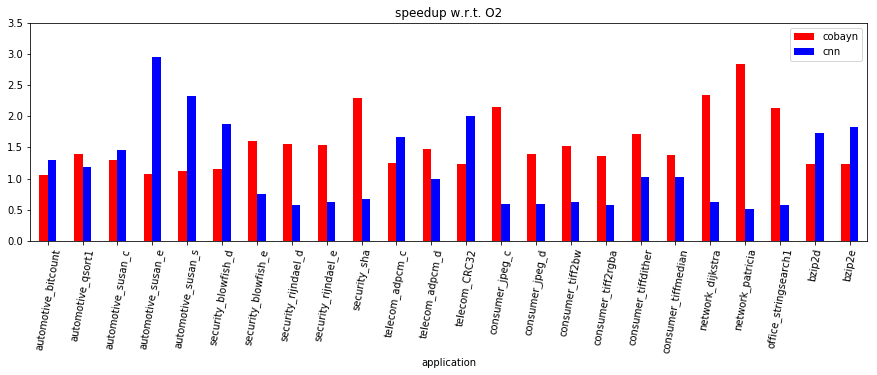

In [2]:
from plot_speedups import plot_speedups
plot_speedups()

The speedups were derived by dividing the execution time achieved by applying the optimizations chosen by the model divided by the execution time achieved when using the `O2` optimization. As the graph above displays, the convolutional neural network achieved better speedups on nine of the twenty-four applications. The graph below displays the speedup achieved on the test application.

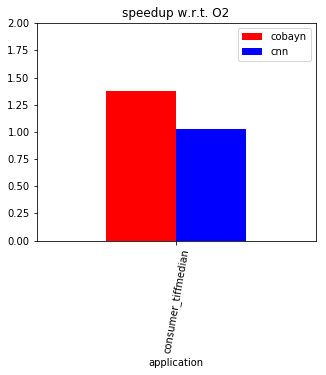

In [2]:
from plot_test_speedups import plot_test_speedups
plot_test_speedups()

As the graph above displays, the test application `consumer_tiffmedian` with the optimizations chosen by the convolutional neural network had a slightly worse speedup than the optimizations chosen using COBAYN.

# Conclusion 

As demonstrated above, Convolutional Neural Networks are capable of predicting the execution time given a particular set of optimizations. The graphs demonstrate that the model was capable of fitting the particular execution time given a the particular optimizations applied to the program.   

While the model was capable of predicting some of the execution times accurately, on others it was off by quite a lot as can be observed in the graphs above. This is likely because the model was either overfit (i.e. memorizing the training set). This project had a relatively small dataset and more data would likely produce a more accurate model.

The models with extremely low loss tended to just draw a straight line through all of the execution times. Perhaps in future research a different reward function should be used. Just taking the distance between the predicted and actual execution times meand that if the model just always outputs the average execution time it will be able to achieve a relatively low loss.

This project demonstrates that convolutional neural networks can be used to predict the execution time of programs.

# References

Ashouri, Amir H., Mariani, Giovanni, Palermo, Gianluca, Park, EunJung (EJ), Cavazos, John & Silvano, Cristina. (2016). *COBAYN: Compiler autotuning framework using Bayesian networks*. https://doi.org/10.1145/2928270


Craig Blackmore, Oliver Ray, & Kerstin Eder. (2017). *Automatically Tuning the GCC Compiler to Optimize the Performance of Applications Running on Embedded Systems*. https://arxiv.org/abs/1703.08228

Stefano Cereda, Gianluca Palermo, Paolo Cremonesi, Stefano Doni. (2020). *A Collaborative Filtering Approach for the Automatic Tuning of Compiler Optimisations*. https://arxiv.org/abs/2005.04092

Amir Hossein Ashouri, Giovanni Mariani, Gianluca Palermo & Cristina Silvano. (2014) *A Bayesian Network Approach for Compiler Auto-tuning for Embedded Processors*.
http://dx.doi.org/10.1109/ESTIMedia.2014.6962349

Amir H. Ashouri, William Killian, John Cavazos, Gianluca Palermo & Cristina Silvano. (2018) *A Survey on Compiler Autotuning using Machine Learning*. https://arxiv.org/abs/1801.04405

*Soumith Chintala. 2017. *Neural Networks*. https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

*PyTorch Tutorials*. https://pytorch.org/tutorials/

*PyTorch Docs*. https://pytorch.org/docs/stable/

*Scikit-Learn*. https://scikit-learn.org/

# Appendix 

## batch_size_metrics.py 

In [17]:
import pandas as pd

batch_size_metrics = pd.read_csv(filepath_or_buffer='../data/batch_size_metrics.csv').drop('Unnamed: 0', axis=1)

## build-dataset.py

In [ ]:
import pandas as pd
import numpy as np

#Get Flags and Execution Times
flags_csv = pd.read_csv('../raw_data/cBench_onPandaboard_24app_5ds.csv')


y = flags_csv.iloc[:,8:-1]
y.insert(0, 'APP_NAME', list(flags_csv['APP_NAME']), True,)
print('y:', y.shape)
flags = flags_csv.iloc[:,:8]
flags.insert(flags.shape[1], 'code_size', flags_csv['code_size'] ,True)
print('flags:', flags.shape)

flags = flags.replace(to_replace='X', value=0)
flags = flags.replace(to_replace='-', value=1, regex=True)
flags.head(n=5)


#Get Static
static_csv = pd.read_csv('../raw_data/ft_Milepost_cbench.csv')
print('static:', static_csv.shape)

static = static_csv.drop(['DATASET'], axis=1)
static.drop_duplicates(keep='first', inplace=True)
static = static.reset_index()
static.head()


#Get Dynamic
dynamic_csv = pd.read_csv('../raw_data/ft_MICA_cbench.csv')
print('dynamic:', dynamic_csv.shape)

dynamic = dynamic_csv.rename(columns={'APPLICATION_NAME': 'APP_NAME'})
dynamic_list = [pd.DataFrame(dynamic[dynamic['DATASET'] == val].iloc[:24]).drop(['DATASET'], axis=1).rename(columns=lambda x: x + '_' + val[-1:]).reset_index() for val in list(dynamic['DATASET'].unique())]
dynamic = pd.concat(dynamic_list, axis=1, sort=False).drop('index', axis=1)
dynamic = dynamic.drop(['APP_NAME_' + str(i) for i in range(2,6)], axis=1).rename(columns={'APP_NAME_1': 'APP_NAME'})
dynamic.head()


apps = list(static['APP_NAME'].unique())

flags_temp = flags[flags['APP_NAME'] == apps[0]]

static_temp = pd.DataFrame(static[static['APP_NAME'] == apps[0]])
static_temp = pd.concat([static_temp]*128, ignore_index=True).drop('APP_NAME', axis=1)

dynamic_temp = pd.DataFrame(dynamic[dynamic['APP_NAME'] == apps[0]])
dynamic_temp = pd.concat([dynamic_temp]*128, ignore_index=True).drop('APP_NAME', axis=1)

y_temp = y[y['APP_NAME'] == apps[0]].reset_index(drop=True).drop('APP_NAME', axis=1)

data = pd.concat([flags_temp, static_temp, dynamic_temp, y_temp], axis=1, sort=False)

for app in apps[1:]:
    flags_temp = pd.DataFrame(flags[flags['APP_NAME'] == app]).reset_index(drop=True)
    
    static_temp = pd.DataFrame(static[static['APP_NAME'] == app])
    static_temp = pd.concat([static_temp]*128, ignore_index=True).reset_index(drop=True).drop('APP_NAME', axis=1)
    
    dynamic_temp = pd.DataFrame(dynamic[dynamic['APP_NAME'] == app])
    dynamic_temp = pd.concat([dynamic_temp]*128, ignore_index=True).reset_index(drop=True).drop('APP_NAME', axis=1)
    
    y_temp = y[y['APP_NAME'] == app].reset_index(drop=True).drop('APP_NAME', axis=1)
    
    data_app = pd.concat([flags_temp, static_temp, dynamic_temp, y_temp], axis=1, sort=False)
    
    data = pd.concat([data, data_app], axis=0, sort=False)

data = data.reset_index(drop=True).drop('index', axis=1)


data.head()


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data.iloc[:,1:].values)
scaled_data = pd.concat([data['APP_NAME'], pd.DataFrame(scaler.transform(data.iloc[:,1:].values))], axis=1, ignore_index=True)
scaled_data.columns = data.columns


def data_to_csv(dataset, csv_name):
    if str(csv_name[-4:]) != '.csv':
        csv_name = str(csv_name) + '.csv'
    with open('../data/' + csv_name, 'w') as dataset_csv:
        dataset_csv.write(dataset.to_csv(index=False))


data_to_csv(data, 'data')


scaled_data.head()

## cnn_speedups.py

In [ ]:
import pandas as pd
cnn_speedups = pd.read_csv('../data/cnn_speedups.csv').values[0][1:]

## cobayn_speedups.py

In [ ]:
import pandas as pd
cobayn_speedups = pd.read_csv('../data/cobayn_speedups.csv').values[0][1:]

## find_token.py

In [ ]:
find_token = lambda name, start, end: name[name.find(start) + len(start): name.find(end)]

## get_batch_size_metrics.py 

In [ ]:
import os, torch, pandas as pd
from sklearn.metrics import mean_squared_error
from find_token import find_token
from test_set import test_set
from net import net
net.eval()

batch_sizes, test_losses = [], []
for model in os.listdir('../diff_batch_sizes'):
    #Get batch size
    batch_size = int(find_token(model, 'batch_size=', '__lr='))
    
    #Load the model
    net.load_state_dict(torch.load('../diff_batch_sizes/' + model, map_location=torch.device('cpu')))
    
    test_predictions = []
    for start_index in range(0, test_set.shape[0] - batch_size + 1, batch_size):
        #get batches
        X = test_set[start_index:start_index + batch_size, :-5].view(batch_size,1,285)
        y = test_set[start_index:start_index + batch_size, -5:]
        #forward pass
        outputs = net(X).view(batch_size,5).detach()
        test_predictions.append(outputs)

    predictions = torch.cat(test_predictions, dim=0).numpy()
    
    
    
    batch_sizes.append(batch_size)
    test_losses.append(mean_squared_error(test_set.numpy()[:,-5:], predictions))

diff_batch_sizes = pd.DataFrame({
    'Batch Size': batch_sizes,
    'Test Loss': test_losses

})

diff_batch_sizes.sort_values(by='Batch Size').to_csv('../data/batch_size_metrics.csv')



## get_loocv_metrics.py

In [ ]:
import pandas as pd
from find_token import find_token

with open('../leave_one_out_epochs=50_batch_size=4', 'r') as b_4:
    b_4_lines = b_4.readlines()

pd.DataFrame({
    'App Name': [find_token(line, '', ', epoch') for line in b_4_lines],
    'Train Loss': [float(find_token(line, 'train loss: ', ', test loss: ')) for line in b_4_lines],
    'Test Loss': [float(find_token(line, 'test loss: ', ', average test_loss ')) for line in b_4_lines],
    'Average Test Loss': [float(find_token(line, 'average test_loss ', '\n')) for line in b_4_lines],
}).to_csv(path_or_buf='../data/metrics.csv')

## get_speedups.py

In [ ]:
import torch, pandas as pd, numpy as np

from net import net
from train_set import train_set
from test_set import test_set
from predict import predict

apps = pd.read_csv('../data/data.csv').iloc[:,0]#.unique()

cobayn_speedups = dict(zip(apps.unique(), ([i] for i in [1.05, 1.4, 1.30, 1.08, 1.12, 1.15, 1.6, 1.56, 1.54, 2.3, 1.25, 1.48, 1.23, 2.15, 1.40, 1.53, 1.37, 1.72, 1.38, 2.35, 2.85, 2.14, 1.23, 1.23])))

cnn_speedups = {}
data = torch.cat([train_set[:2304], test_set, train_set[2304:]])

for i in range(0,3072,128):
    shuffled_data = data[i:i+128,:][torch.randperm(128)]
    train_predictions, optimizations = predict(net, 32, shuffled_data), shuffled_data
    a = pd.DataFrame(shuffled_data.numpy())
    prediction = train_predictions.sum(axis=1).min()
    o2 = a[(a[0] == 0) & (a[1] == 0) & (a[2] == 0) & (a[3] == 0) & (a[4] == 0) & (a[5] == 0) & (a[6] == 1)].iloc[:,-5:].sum(axis=1).values[0]
    cnn_speedups[apps[i]] = [prediction/o2]

pd.DataFrame(cobayn_speedups).to_csv(path_or_buf='../data/cobayn_speedups.csv')
pd.DataFrame(cnn_speedups).to_csv(path_or_buf='../data/cnn_speedups.csv')

## leave-one-out-cross-validation.py

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


#Load the data
data = pd.read_csv('../data/data.csv')
relevent_data = data.drop('code_size', axis=1)
test_app = 'consumer_tiffmedian'


from net import net
losses = []
net = net.to(device)
net.train()


def train_test_split(test_app):
  train_data  = relevent_data[relevent_data['APP_NAME'] != test_app]
  test_data = relevent_data[relevent_data['APP_NAME'] == test_app]
  scaler = MinMaxScaler(feature_range=(0,1)).fit(relevent_data[relevent_data['APP_NAME'] != test_app].iloc[:,1:-5])
  scaled_train_predictors = scaler.transform(relevent_data[relevent_data['APP_NAME'] != test_app].iloc[:,1:-5])
  train_targets = relevent_data[relevent_data['APP_NAME'] != test_app].iloc[:,-5:]
  scaled_train_targets = []
  for app in range(0, train_targets.shape[0], 128):
    scaled_train_targets.append(MinMaxScaler(feature_range=(0,1)).fit_transform(train_targets.iloc[app:app+128]))
  scaled_train_targets = np.array(scaled_train_targets).reshape(train_targets.shape[0],5)
  scaled_test_predictors = MinMaxScaler(feature_range=(0,1)).fit_transform(relevent_data[relevent_data['APP_NAME'] == test_app].iloc[:,1:-5])
  scaled_test_targets = MinMaxScaler(feature_range=(0,1)).fit_transform(relevent_data[relevent_data['APP_NAME'] == test_app].iloc[:,-5:])
  train_set = torch.tensor(
      data=np.concatenate(
          (
              scaled_train_predictors,
              scaled_train_targets
          ),
          axis=1
      ),
      dtype=torch.float
      ).to(device)
  test_set = torch.tensor(
    data=np.concatenate(
        (
            scaled_test_predictors,
            scaled_test_targets
        ),
        axis=1
    ),
    dtype=torch.float
  ).to(device)
  return train_set, test_set


#Set hyperparameters
batch_size = 32
epochs = 50
lr=1e-4
weight_decay = 1e-4

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)


for test_app in relevent_data['APP_NAME'].unique():
  train_set, test_set = train_test_split(test_app)
  test_losses = []
  #Training loop
  for epoch in range(epochs):
      
      #Set train loss to zero
      running_loss = 0.0
      
      #Shuffle training set
      shuffled_train_set = train_set[torch.randperm(train_set.shape[0])]
      
      for start_index in range(0, shuffled_train_set.shape[0] - batch_size, batch_size):
          #get batches
          X = shuffled_train_set[start_index:start_index + batch_size, :-5].view(batch_size,1,285)
          y = shuffled_train_set[start_index:start_index + batch_size, -5:]
          
          #zero gradients
          optimizer.zero_grad()
          
          #forward pass
          outputs = net(X).view(batch_size,5)
          
          #get loss
          loss = criterion(outputs, y)
          
          #backward pass
          loss.backward()
          optimizer.step()
          running_loss += loss.item()

      #Set test loss to zero
      test_loss = 0.0

      #Shuffle test set
      shuffled_test_set = test_set[torch.randperm(test_set.shape[0])]

      for start_index in range(0, shuffled_test_set.shape[0] - batch_size, batch_size):

          #get batches
          X = shuffled_test_set[start_index:start_index + batch_size, :-5].view(batch_size,1,285)
          y = shuffled_test_set[start_index:start_index + batch_size, -5:]

          #forward pass
          outputs = net(X).view(batch_size,5)

          #get loss
          loss = criterion(outputs, y)
          test_loss += loss.item() * 23
      test_losses.append(test_loss)

  print('{}, epoch {}, train loss: {}, test loss: {}, average test_loss {}'.format(test_app, epoch, running_loss, test_loss, sum(test_losses)/len(test_losses) ))


from sklearn.metrics import mean_squared_error

from predict import predict
from plot_execution_times import plot_execution_times


predictions = predict(net, 32, test_set)

print('Test Loss:', mean_squared_error(test_set[:,-5:], predictions))
plot_execution_times(predictions, test_set[:, -5:])

## loocv_metrics.py

In [ ]:
import pandas as pd

loocv_metrics = pd.read_csv(filepath_or_buffer='../data/loocv_metrics.csv').drop('Unnamed: 0', axis=1)

## net.py

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#define neural net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.pool1 = nn.MaxPool1d(kernel_size=2, padding=1)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=10, kernel_size=5, padding=3, stride=1)
        self.conv2 = nn.Conv1d(in_channels=10, out_channels=20, kernel_size=5, padding=3, stride=1)
        self.conv3 = nn.Conv1d(in_channels=20, out_channels=10, kernel_size=5, padding=3, stride=1)
        self.conv4 = nn.Conv1d(in_channels=10, out_channels=1, kernel_size=5, padding=3, stride=1)

        self.fc1 = nn.Linear(in_features=21, out_features=150)
        self.dropout = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(in_features=150, out_features=200)
        self.batch_norm = nn.BatchNorm1d(1)
        self.fc3 = nn.Linear(in_features=200, out_features=100)
        self.fc4 = nn.Linear(in_features=100, out_features=5)
        
        
    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool1(self.conv2(x))
        x = self.pool1(self.conv3(x))
        x = self.pool1(self.conv4(x))
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.batch_norm(x)
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x
net = Net()

## plot_execution_times.py

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Plot execution times
def plot_execution_times(predictions, actuals):
    times = [
        pd.DataFrame({
            'optimization': list(range(predictions.shape[0])),
            'predicted': predictions[:,i],
            'actual': actuals[:,i]
        }) for i in range(5)
    ]
    figure, axes = plt.subplots(3, 2, figsize=(40,30))
    figure.delaxes(axes[2,1])
    times[0].plot.line(ax=axes[0,0], x='optimization', y=['actual', 'predicted'], color=['r','b']).set(title='execution time 1')
    times[1].plot.line(ax=axes[0,1], x='optimization', y=['actual', 'predicted'], color=['r','b']).set(title='execution time 2')
    times[2].plot.line(ax=axes[1,0], x='optimization', y=['actual', 'predicted'], color=['r','b']).set(title='execution time 3')
    times[3].plot.line(ax=axes[1,1], x='optimization', y=['actual', 'predicted'], color=['r','b']).set(title='execution time 4')
    times[4].plot.line(ax=axes[2,0], x='optimization', y=['actual', 'predicted'], color=['r','b']).set(title='execution time 5')  

## plot_losses.py

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Plot execution times
def plot_losses(losses):
    pd.DataFrame({
        'epochs': np.arange(500),
        'losses': losses[-500:]
    }).plot.line(x='epochs', y='losses', color=['r','b'], figsize=(20, 10)).set(title='last 500 losses', xlabel='epochs', ylabel='loss')

## plot_speedups.py 

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
apps = pd.read_csv('../data/data.csv')['APP_NAME'].unique()

from cnn_speedups import cnn_speedups
from cobayn_speedups import cobayn_speedups

def plot_speedups():
	pd.DataFrame({
	    'application': np.arange(24),
	    'cobayn': cobayn_speedups,
	    'cnn': cnn_speedups
	}).plot.bar(x='application', y=['cobayn', 'cnn'], color=['r','b'], figsize=(15,4), ylim=(1,3.5)).set(title='speedup w.r.t. O2')
	plt.xticks(np.arange(24), labels=apps, rotation=80)

plot_speedups()

## plot_test_speedups.py

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
apps = pd.read_csv('../data/data.csv')['APP_NAME'].unique()

from cnn_speedups import cnn_speedups
from cobayn_speedups import cobayn_speedups

def plot_test_speedups():
	pd.DataFrame({
	    'application': [0],
	    'cobayn': cobayn_speedups[-6],
	    'cnn': cnn_speedups[-6]
	}).plot.bar(x='application', y=['cobayn', 'cnn'], color=['r','b'], figsize=(5,4), ylim=(1,2)).set(title='speedup w.r.t. O2')
	plt.xticks([0], labels=['consumer_tiffmedian'], rotation=80)

plot_test_speedups()

## predict.py

In [ ]:
from net import net
import torch

def predict(net, batch_size, test_set):
    test_predictions = []
    for start_index in range(0, test_set.shape[0] - batch_size + 1, batch_size):
        #get batches
        X = test_set[start_index:start_index + batch_size, :-5].view(batch_size,1,285)
        y = test_set[start_index:start_index + batch_size, -5:]
        #forward pass
        outputs = net(X).view(batch_size,5).detach()
        test_predictions.append(outputs)

    return torch.cat(test_predictions, dim=0).numpy()

## process_data.py

In [ ]:
import pandas as pd, numpy as np
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('../data/data.csv')
relevent_data = data.drop('code_size', axis=1)
test_app = 'consumer_tiffmedian'

def train_test_split(test_app):
    train_data  = relevent_data[relevent_data['APP_NAME'] != test_app]
    test_data = relevent_data[relevent_data['APP_NAME'] == test_app]
    scaled_train_predictors = MinMaxScaler(feature_range=(0,1)).fit_transform(relevent_data[relevent_data['APP_NAME'] != test_app].iloc[:,1:-5])
    train_targets = relevent_data[relevent_data['APP_NAME'] != test_app].iloc[:,-5:]
    scaled_train_targets = []
    for app in range(0, train_targets.shape[0], 128):
        scaled_train_targets.append(MinMaxScaler(feature_range=(0,1)).fit_transform(train_targets.iloc[app:app+128]))
    scaled_train_targets = np.array(scaled_train_targets).reshape(train_targets.shape[0],5)
    scaled_test_predictors = MinMaxScaler(feature_range=(0,1)).fit_transform(relevent_data[relevent_data['APP_NAME'] == test_app].iloc[:,1:-5])
    scaled_test_targets = MinMaxScaler(feature_range=(0,1)).fit_transform(relevent_data[relevent_data['APP_NAME'] == test_app].iloc[:,-5:])
    train_set = np.concatenate(
          (
              scaled_train_predictors,
              scaled_train_targets
          ),
          axis=1
      )
    test_set = np.concatenate(
        (
            scaled_test_predictors,
            scaled_test_targets
        ),
        axis=1
    )
    return train_set, test_set
train_set, test_set = train_test_split(test_app)
pd.DataFrame(train_set).to_csv(path_or_buf='../data/train.csv', index=False)
pd.DataFrame(test_set).to_csv(path_or_buf='../data/test.csv', index=False)

train, test = pd.read_csv('../data/train.csv'), pd.read_csv('../data/test.csv')
print(train.head())
print(test.head())



## test_set.py

In [ ]:
import pandas as pd
import torch
test_set = torch.tensor(pd.read_csv('../data/test.csv').values, dtype=torch.float)[torch.randperm(128)]

## test_set_unscaled_ys.py

In [ ]:
import pandas as pd
import torch
test_set_unscaled_ys = torch.tensor(pd.read_csv('../data/test_unscaled_ys.csv').values, dtype=torch.float)[torch.randperm(128)]


## train-model.py

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


from net import net
losses = []
net = net.to(device)
net.train()


#Set hyperparameters
batch_size = 32
epochs = 500
lr=1e-4
weight_decay = 1e-4

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)


#Get Train set
from train_set import train_set
train_set = train_set.to(device)

#Training loop
for epoch in range(epochs):
    
    #Set loss to zero
    running_loss = 0.0
    
    #Shuffle training set
    shuffled_train_set = train_set[torch.randperm(train_set.shape[0])]
    
    for start_index in range(0, shuffled_train_set.shape[0] - batch_size, batch_size):
        
        #get batches
        X = shuffled_train_set[start_index:start_index + batch_size, :-5].view(batch_size,1,285)
        y = shuffled_train_set[start_index:start_index + batch_size, -5:]
        
        #zero gradients
        optimizer.zero_grad()
        
        #forward pass
        outputs = net(X).view(batch_size,5)
        
        #get loss
        loss = criterion(outputs, y)
        
        #backward pass
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    if epoch % 50 == 49 or epoch == 0:    # print every 10 epochs
        print('{} epoch {} loss: {}'.format('', epoch if epoch > len(losses) else len(losses), running_loss))
    losses.append(running_loss)


from plot_losses import plot_losses
plot_losses(losses)


from sklearn.metrics import mean_squared_error

from predict import predict
from plot_execution_times import plot_execution_times
from test_set import test_set
test_set = test_set.to(device)
net.eval()


predictions = predict(net, 32, test_set)

print('Test Loss:', mean_squared_error(test_set[:,-5:], predictions))
plot_execution_times(predictions, test_set[:, -5:])

## train_set.py

In [ ]:
import pandas as pd
import torch
train_set = torch.tensor(pd.read_csv('../data/train.csv').values, dtype=torch.float)[torch.randperm(128)]